<a href="https://colab.research.google.com/github/hyguozz/Git_2024/blob/main/TS_V7good_V1112_128_CombinedModel_timeseries_rs_fMRI_DataAnalysis_ASD_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))


Found GPU at: /device:GPU:0


In [ ]:
import time
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset

import pickle
from sklearn.model_selection import train_test_split

In [ ]:
import numpy as np
import pickle
from sklearn.model_selection import train_test_split

# Paths to save the datasets
#save_dir = '/content/drive/My Drive/ASD_project_2024/saved_data/NormZ_pcc_60ts_50ol/'

save_dir = '/content/drive/My Drive/ASD_project_2024/saved_data/Cleaned_110ts_1segs/'
# Load ASD datasets
with open(save_dir + 'X_train_ts_ASD.pkl', 'rb') as f:
    X_train_ts_ASD = pickle.load(f)
with open(save_dir + 'X_train_pcc_ASD.pkl', 'rb') as f:
    X_train_pcc_ASD = pickle.load(f)
with open(save_dir + 'labels_train_ASD.pkl', 'rb') as f:
    labels_train_ASD = pickle.load(f)
with open(save_dir + 'target_ts_train_ASD.pkl', 'rb') as f:
    target_ts_train_ASD = pickle.load(f)

# Loading the validation data
with open(save_dir + 'X_val_ts_ASD.pkl', 'rb') as f:
    X_val_ts_ASD = pickle.load(f)
with open(save_dir + 'X_val_pcc_ASD.pkl', 'rb') as f:
    X_val_pcc_ASD = pickle.load(f)
with open(save_dir + 'labels_val_ASD.pkl', 'rb') as f:
    labels_val_ASD = pickle.load(f)
with open(save_dir + 'target_ts_val_ASD.pkl', 'rb') as f:
    target_ts_val_ASD = pickle.load(f)

# Loading the test data
with open(save_dir + 'X_test_ts_ASD.pkl', 'rb') as f:
    X_test_ts_ASD = pickle.load(f)
with open(save_dir + 'X_test_pcc_ASD.pkl', 'rb') as f:
    X_test_pcc_ASD = pickle.load(f)
with open(save_dir + 'labels_test_ASD.pkl', 'rb') as f:
    labels_test_ASD = pickle.load(f)
with open(save_dir + 'target_ts_test_ASD.pkl', 'rb') as f:
    target_ts_test_ASD = pickle.load(f)

# Loading the VAE data
with open(save_dir + 'X_VAE_ts_ASD.pkl', 'rb') as f:
    X_VAE_ts_ASD = pickle.load(f)
with open(save_dir + 'X_VAE_pcc_ASD.pkl', 'rb') as f:
    X_VAE_pcc_ASD = pickle.load(f)
with open(save_dir + 'target_ts_VAE_ASD.pkl', 'rb') as f:
    target_ts_VAE_ASD = pickle.load(f)
with open(save_dir + 'labels_VAE_ASD.pkl', 'rb') as f:
    labels_VAE_ASD = pickle.load(f)


In [ ]:
# Loading the train data
with open(save_dir + 'X_train_ts_TD.pkl', 'rb') as f:
    X_train_ts_TD = pickle.load(f)
with open(save_dir + 'X_train_pcc_TD.pkl', 'rb') as f:
    X_train_pcc_TD = pickle.load(f)
with open(save_dir + 'labels_train_TD.pkl', 'rb') as f:
    labels_train_TD = pickle.load(f)
with open(save_dir + 'target_ts_train_TD.pkl', 'rb') as f:
    target_ts_train_TD = pickle.load(f)

# Loading the validation data
with open(save_dir + 'X_val_ts_TD.pkl', 'rb') as f:
    X_val_ts_TD = pickle.load(f)
with open(save_dir + 'X_val_pcc_TD.pkl', 'rb') as f:
    X_val_pcc_TD = pickle.load(f)
with open(save_dir + 'labels_val_TD.pkl', 'rb') as f:
    labels_val_TD = pickle.load(f)
with open(save_dir + 'target_ts_val_TD.pkl', 'rb') as f:
    target_ts_val_TD = pickle.load(f)

# Loading the test data
with open(save_dir + 'X_test_ts_TD.pkl', 'rb') as f:
    X_test_ts_TD = pickle.load(f)
with open(save_dir + 'X_test_pcc_TD.pkl', 'rb') as f:
    X_test_pcc_TD = pickle.load(f)
with open(save_dir + 'labels_test_TD.pkl', 'rb') as f:
    labels_test_TD = pickle.load(f)
with open(save_dir + 'target_ts_test_TD.pkl', 'rb') as f:
    target_ts_test_TD = pickle.load(f)

# Loading the VAE data
with open(save_dir + 'X_VAE_ts_TD.pkl', 'rb') as f:
    X_VAE_ts_TD = pickle.load(f)
with open(save_dir + 'X_VAE_pcc_TD.pkl', 'rb') as f:
    X_VAE_pcc_TD = pickle.load(f)
with open(save_dir + 'target_ts_VAE_TD.pkl', 'rb') as f:
    target_ts_VAE_TD = pickle.load(f)
with open(save_dir + 'labels_VAE_TD.pkl', 'rb') as f:
    labels_VAE_TD = pickle.load(f)


In [ ]:
import time
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset

class CustomDataset(Dataset):
    def __init__(self, X_pcc, y_class,X_ts,X_target_ts):
        self.X_ts = X_ts
        self.X_pcc = X_pcc
        self.X_target_ts = X_target_ts
        self.y_class = y_class  # Shape: (num_samples,) binary labels (0 or 1)

    def __len__(self):
        return len(self.X_pcc)

    def __getitem__(self, idx):
        return self.X_pcc[idx], self.y_class[idx] , self.X_ts[idx], self.X_target_ts[idx]

In [ ]:
# For ROIs selection purpose
# Combine ASD and TD training data
X_pcc_combined_ASD = np.concatenate((X_train_pcc_ASD, X_VAE_pcc_ASD), axis=0)
#X_train_pcc_combined = np.concatenate((X_train_pcc_ASD[:,list(ROI_list)], X_train_pcc_TD[:,list(ROI_list)]), axis=0)
X_labels_combined_ASD = np.concatenate((labels_train_ASD, labels_VAE_ASD), axis=0)

X_pcc_combined_TD = np.concatenate((X_train_pcc_TD, X_VAE_pcc_TD), axis=0)
#X_train_pcc_combined = np.concatenate((X_train_pcc_ASD[:,list(ROI_list)], X_train_pcc_TD[:,list(ROI_list)]), axis=0)
X_labels_combined_TD = np.concatenate((labels_train_TD, labels_VAE_TD), axis=0)

In [ ]:
# Step 1: Calculate mean values for each column in X_train_VAE
mean_values1 = np.mean(X_pcc_combined_ASD, axis=0)

# Step 2: Get the absolute values and select the top 5000 indices
top_indices1 = np.argsort(np.abs(mean_values1))[-9148:]  # Get indices of the top 5000 absolute values
# Step 1: Calculate mean values for each column in X_train_VAE
mean_values2 = np.mean(X_pcc_combined_TD, axis=0)

# Step 2: Get the absolute values and select the top 5000 indices
top_indices2 = np.argsort(np.abs(mean_values2))[-9148:]  # Get indices of the top 5000 absolute values

selected_ROIs = list(set(top_indices1) | set(top_indices2))

In [ ]:
mean_values1.max(),np.sum(abs(mean_values2) >= 0.1), np.sum(abs(mean_values1) >=0.1)

(0.6766542745794684, 8996, 7819)

In [ ]:
import pickle

# Define the file path
file_path = save_dir + 'selected_ROIs.pkl'

# Save the selected_ROIs object to a .pkl file
with open(file_path, 'wb') as f:
    pickle.dump(selected_ROIs, f)

print("selected_ROIs saved successfully.")


selected_ROIs saved successfully.


In [ ]:
# Reading in the selected_ROIs.pkl file
with open(save_dir + 'selected_ROIs.pkl', 'rb') as f:
    selected_ROIs = pickle.load(f)

print("selected_ROIs loaded successfully")


selected_ROIs loaded successfully


In [ ]:
len(selected_ROIs)

10398

In [ ]:
batch_size = 32

In [ ]:
# Train set + VAE set = Train set
# train_vae_loader
# Nov. 2.

# Combine ASD and TD training data
X_pcc_combined_ASD = np.concatenate((X_train_pcc_ASD[:,selected_ROIs], X_VAE_pcc_ASD[:,selected_ROIs]), axis=0)
X_labels_combined_ASD = np.concatenate((labels_train_ASD, labels_VAE_ASD), axis=0)
X_ts_combined_ASD = np.concatenate((X_train_ts_ASD, X_VAE_ts_ASD), axis=0)
X_target_ts_combined_ASD = np.concatenate((target_ts_train_ASD, target_ts_VAE_ASD), axis=0)

X_pcc_combined_TD = np.concatenate((X_train_pcc_TD[:,selected_ROIs], X_VAE_pcc_TD[:,selected_ROIs]), axis=0)
X_labels_combined_TD = np.concatenate((labels_train_TD, labels_VAE_TD), axis=0)
X_ts_combined_TD = np.concatenate((X_train_ts_TD, X_VAE_ts_TD), axis=0)
X_target_ts_combined_TD = np.concatenate((target_ts_train_TD, target_ts_VAE_TD), axis=0)

X_pcc_combined = np.concatenate((X_pcc_combined_ASD, X_pcc_combined_TD), axis=0)
X_labels_combined = np.concatenate((X_labels_combined_ASD, X_labels_combined_TD), axis=0)
X_ts_combined = np.concatenate((X_ts_combined_ASD, X_ts_combined_TD), axis=0)
X_target_ts_combined = np.concatenate((X_target_ts_combined_ASD, X_target_ts_combined_TD), axis=0)

X_ts_combined_tensor = torch.tensor(X_ts_combined, dtype=torch.float32)
X_pcc_combined_tensor = torch.tensor(X_pcc_combined, dtype=torch.float32)
X_labels_combined_tensor = torch.tensor(X_labels_combined, dtype=torch.long)
X_target_ts_combined_tensor = torch.tensor(X_target_ts_combined, dtype=torch.float32)

# Create dataset and dataloader for combined data
train_vae_dataset = CustomDataset(X_pcc_combined_tensor, X_labels_combined_tensor, X_ts_combined_tensor, X_target_ts_combined_tensor)
train_vae_loader = DataLoader(train_vae_dataset, batch_size, shuffle=True)




In [ ]:
# Oct 26

# Combine ASD and TD test data
X_test_ts_combined = np.concatenate((X_test_ts_ASD, X_test_ts_TD), axis=0)
target_ts_test_combined = np.concatenate((target_ts_test_ASD, target_ts_test_TD), axis=0)
X_test_pcc_combined = np.concatenate((X_test_pcc_ASD[:,selected_ROIs], X_test_pcc_TD[:,selected_ROIs]), axis=0)
labels_test_combined = np.concatenate((labels_test_ASD, labels_test_TD), axis=0)

#X_train_target_ts_combined = np.concatenate((target_ts_train_ASD, target_ts_train_TD), axis=0)
# Combine ASD and TD validation data
target_ts_val_combined = np.concatenate((target_ts_val_ASD, target_ts_val_TD), axis=0)
X_val_ts_combined = np.concatenate((X_val_ts_ASD, X_val_ts_TD), axis=0)
X_val_pcc_combined = np.concatenate((X_val_pcc_ASD[:,selected_ROIs], X_val_pcc_TD[:,selected_ROIs]), axis=0)
labels_val_combined = np.concatenate((labels_val_ASD, labels_val_TD), axis=0)
#X_test_pcc_combined.shape,  X_train_pcc_combined.shape, X_val_pcc_combined.shape

#Convert test datasets to tensors
X_test_ts_combined_tensor = torch.tensor(X_test_ts_combined, dtype=torch.float32)
X_test_pcc_combined_tensor = torch.tensor(X_test_pcc_combined, dtype=torch.float32)
labels_test_combined_tensor = torch.tensor(labels_test_combined, dtype=torch.long)
target_ts_test_combined_tensor = torch.tensor(target_ts_test_combined, dtype=torch.float32)
# Create dataset and dataloader for test data
#test_dataset = CustomDataset(X_test_ts_combined_tensor, X_test_pcc_combined_tensor, labels_test_combined_tensor)
test_dataset = CustomDataset(X_test_pcc_combined_tensor,  labels_test_combined_tensor, X_test_ts_combined_tensor, target_ts_test_combined_tensor)
test_loader = DataLoader(test_dataset, batch_size, shuffle=True)

# Convert validation datasets to tensors
X_val_ts_combined_tensor = torch.tensor(X_val_ts_combined, dtype=torch.float32)
X_val_pcc_combined_tensor = torch.tensor(X_val_pcc_combined, dtype=torch.float32)
labels_val_combined_tensor = torch.tensor(labels_val_combined, dtype=torch.long)
target_ts_val_combined_tensor = torch.tensor(target_ts_val_combined, dtype=torch.float32)

# Create dataset and dataloader for validation data
val_dataset = CustomDataset(X_val_pcc_combined_tensor, labels_val_combined_tensor, X_val_ts_combined_tensor,target_ts_val_combined_tensor )
val_loader = DataLoader(val_dataset, batch_size, shuffle=True)


In [ ]:
# Combine ASD and TD training data
#X_train_pcc_combined = np.concatenate((X_train_pcc_ASD, X_train_pcc_TD), axis=0)
X_train_pcc_combined = np.concatenate((X_train_pcc_ASD[:,selected_ROIs], X_train_pcc_TD[:,selected_ROIs]), axis=0)
labels_train_combined = np.concatenate((labels_train_ASD, labels_train_TD), axis=0)
X_train_ts_combined = np.concatenate((X_train_ts_ASD, X_train_ts_TD), axis=0)
target_ts_train_combined = np.concatenate((target_ts_train_ASD, target_ts_train_TD), axis=0)

X_train_pcc_combined_tensor = torch.tensor(X_train_pcc_combined, dtype=torch.float32)
labels_train_combined_tensor = torch.tensor(labels_train_combined, dtype=torch.long)
X_train_ts_combined_tensor = torch.tensor(X_train_ts_combined, dtype=torch.float32)
target_ts_train_combined_tensor = torch.tensor(target_ts_train_combined, dtype=torch.float32)

train_dataset = CustomDataset(X_train_pcc_combined_tensor, labels_train_combined_tensor, X_train_ts_combined_tensor, target_ts_train_combined_tensor)
train_loader = DataLoader(train_dataset, batch_size, shuffle=True)
#######################

X_VAE_ts_combined = np.concatenate((X_VAE_ts_ASD, X_VAE_ts_TD), axis=0)
X_VAE_pcc_combined = np.concatenate((X_VAE_pcc_ASD[:,selected_ROIs], X_VAE_pcc_TD[:,selected_ROIs]), axis=0)
labels_VAE_combined = np.concatenate((labels_VAE_ASD, labels_VAE_TD), axis=0)
target_ts_VAE_combined = np.concatenate((target_ts_VAE_ASD, target_ts_VAE_TD), axis=0)

X_VAE_pcc_combined_tensor = torch.tensor(X_VAE_pcc_combined, dtype=torch.float32)
labels_VAE_combined_tensor = torch.tensor(labels_VAE_combined, dtype=torch.long)
X_VAE_ts_combined_tensor = torch.tensor(X_VAE_ts_combined, dtype=torch.float32)
target_ts_VAE_combined_tensor = torch.tensor(target_ts_VAE_combined, dtype=torch.float32)

VAE_dataset = CustomDataset(X_VAE_pcc_combined_tensor, labels_VAE_combined_tensor, X_VAE_ts_combined_tensor, target_ts_VAE_combined_tensor)
VAE_loader = DataLoader(VAE_dataset, batch_size, shuffle=True)


In [ ]:
len(VAE_loader)

11

In [ ]:
# Now the combined datasets are ready
print(f"Combined Training data shape: {X_train_ts_combined.shape}, Labels shape: {labels_train_combined.shape}")
print(f"Combined Validation data shape: {X_val_ts_combined.shape},  Labels shape: {labels_val_combined.shape}")
print(f"Combined Test data shape: {X_test_ts_combined.shape},  Labels shape: {labels_test_combined.shape}")
print(f"Combined VAE data shape: {X_VAE_ts_combined.shape},  Labels shape: {labels_VAE_combined.shape}")

Combined Training data shape: (354, 264, 110), Labels shape: (354,)
Combined Validation data shape: (31, 264, 110),  Labels shape: (31,)
Combined Test data shape: (118, 264, 110),  Labels shape: (118,)
Combined VAE data shape: (339, 264, 110),  Labels shape: (339,)


In [ ]:
X_train_ts_combined[0].shape

(264, 110)

In [ ]:
# Assuming train_loader is a DataLoader instance
for batch_idx, (inputs, labels, ts, target_ts) in enumerate(train_loader):
    if batch_idx == 2:  # We want the 7th batch (index 6)
        print("Inputs (shape: {}):".format(inputs.shape))
        print(inputs)  # Print input time series
        print("Labels (shape: {}):".format(labels.shape))
        print(labels)  # Print labels
        print(target_ts, target_ts.shape)
        break  # Exit after printing the desired batch



Inputs (shape: torch.Size([32, 10398])):
tensor([[ 0.5521,  0.3360,  0.3151,  ..., -0.2263,  0.0452,  0.1927],
        [ 0.6430, -0.0291, -0.1168,  ..., -0.0977,  0.3828,  0.4958],
        [ 0.2510,  0.2945,  0.1021,  ..., -0.2956, -0.0556,  0.4578],
        ...,
        [ 0.0796,  0.0489,  0.1994,  ..., -0.1329,  0.0030,  0.4281],
        [ 0.6666,  0.3037,  0.4434,  ..., -0.1994,  0.4444,  0.5902],
        [ 0.2216,  0.3009,  0.4441,  ..., -0.2157, -0.1484,  0.3919]])
Labels (shape: torch.Size([32])):
tensor([0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
        1, 0, 1, 1, 1, 0, 0, 1])
tensor([[ 1.1262,  1.5376,  0.3835,  ...,  0.9711,  0.4951,  0.0333],
        [ 0.1398, -0.3300,  0.6140,  ..., -0.4577,  1.1648,  0.8489],
        [-1.1296, -1.0540, -0.9207,  ...,  1.2549,  0.5580,  0.4181],
        ...,
        [ 0.3867,  0.0825,  0.9367,  ...,  1.5563, -0.0777,  0.9633],
        [-0.7713, -0.3878, -0.1397,  ..., -2.2437, -1.2453, -0.6343],
        [ 0.427

In [ ]:
ts.shape[1]

264

In [ ]:
# Define the weight initialization function
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0.01)

# Inception + Regression task

In [ ]:

# backup
import torch
import torch.nn as nn
import torch.nn.functional as F

# Inception Block with dilated convolutions
class InceptionBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(InceptionBlock1D, self).__init__()

        # Branch 1: Regular 1D convolution with kernel size 3 (no dilation)
        self.branch1 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=3, padding=1),  # Standard conv with kernel=3
            nn.BatchNorm1d(out_channels),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Dropout(0.5)
        )

        # Branch 2: Dilated 1D convolution with kernel size 5 and dilation=3
        self.branch2 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=5, padding=12, dilation=3),  # Adjusted padding for dilation=3
            nn.BatchNorm1d(out_channels),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Dropout(0.5)
        )

        # Branch 3: Dilated 1D convolution with kernel size 11 and dilation=3
        self.branch3 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=11, padding=30, dilation=3),  # Updated dilation to 3
            nn.BatchNorm1d(out_channels),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Dropout(0.5)
        )

        # Branch Pool: Max pooling and 1x1 convolution
        self.branch_pool = nn.MaxPool1d(kernel_size=3, stride=1, padding=1)
        self.branch_pool_conv = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=1),
            nn.BatchNorm1d(out_channels),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Dropout(0.5)
        )

    def forward(self, x):
        # Get the outputs from all branches
        branch1_out = self.branch1(x)
        branch2_out = self.branch2(x)
        branch3_out = self.branch3(x)
        branch_pool_out = self.branch_pool_conv(self.branch_pool(x))

        # Ensure that all outputs have the same sequence length by applying padding
        target_len = branch1_out.size(2)

        branch2_out = F.pad(branch2_out, (0, target_len - branch2_out.size(2)))

        branch3_out = F.pad(branch3_out, (0, target_len - branch3_out.size(2)))
        branch_pool_out = F.pad(branch_pool_out, (0, target_len - branch_pool_out.size(2)))

        # Concatenate the outputs from all branches
        outputs = torch.cat([branch1_out, branch2_out, branch3_out, branch_pool_out], dim=1)
        return outputs

# Full Model with two Inception blocks and two fully connected layers for regression
class InceptionRegressionModel(nn.Module):
    def __init__(self, in_channels, out_channels, fc_hidden_dim):
        super(InceptionRegressionModel, self).__init__()

        # First Inception Block
        self.inception_block1 = InceptionBlock1D(in_channels, out_channels)

        # Second Inception Block
        self.inception_block2 = InceptionBlock1D(out_channels * 4, out_channels)

        # Fully connected layers
        self.fc1 = nn.Linear(out_channels * 4, fc_hidden_dim)
        self.fc2 = nn.Linear(fc_hidden_dim, 264)  # Output 264 elements for regression

        # LeakyReLU activation
        self.leaky_relu = nn.LeakyReLU(negative_slope=0.1)

    def forward(self, x):
        # Pass through the first inception block
        x = self.inception_block1(x)

        # Pass through the second inception block
        x = self.inception_block2(x)

        # Global average pooling
        x = F.adaptive_avg_pool1d(x, 1).squeeze(-1)  # Squeeze the last dimension

        # Pass through the first fully connected layer with LeakyReLU
        x = self.leaky_relu(self.fc1(x))

        # Pass through the second fully connected layer for regression
        # x = self.fc2(x)
        x = torch.tanh(self.fc2(x)) * 4
        return x


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import TransformerEncoder, TransformerEncoderLayer

# Inception Block with dilated convolutions
class InceptionBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(InceptionBlock1D, self).__init__()

        # Branch 1: Regular 1D convolution with kernel size 3 (no dilation)
        self.branch1 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm1d(out_channels),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Dropout(0.5)
        )

        # Branch 2: Dilated 1D convolution with kernel size 5 and dilation=3
        self.branch2 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=5, padding=12, dilation=3),
            nn.BatchNorm1d(out_channels),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Dropout(0.5)
        )

        # Branch 3: Dilated 1D convolution with kernel size 11 and dilation=3
        self.branch3 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=11, padding=30, dilation=3),
            nn.BatchNorm1d(out_channels),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Dropout(0.5)
        )

        # Branch Pool: Max pooling and 1x1 convolution
        self.branch_pool = nn.MaxPool1d(kernel_size=3, stride=1, padding=1)
        self.branch_pool_conv = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=1),
            nn.BatchNorm1d(out_channels),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Dropout(0.5)
        )

    def forward(self, x):
        branch1_out = self.branch1(x)
        branch2_out = self.branch2(x)
        branch3_out = self.branch3(x)
        branch_pool_out = self.branch_pool_conv(self.branch_pool(x))

        target_len = branch1_out.size(2)
        branch2_out = F.pad(branch2_out, (0, target_len - branch2_out.size(2)))
        branch3_out = F.pad(branch3_out, (0, target_len - branch3_out.size(2)))
        branch_pool_out = F.pad(branch_pool_out, (0, target_len - branch_pool_out.size(2)))

        outputs = torch.cat([branch1_out, branch2_out, branch3_out, branch_pool_out], dim=1)
        return outputs
# tag1
# Full Model with Inception blocks, Transformer Encoder, and regression layers
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import TransformerEncoder, TransformerEncoderLayer

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-torch.log(torch.tensor(10000.0)) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(1)  # Shape: [max_len, 1, d_model]
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(0), :]
        return x

class InceptionTransformerRegressionModel(nn.Module):
    def __init__(self, in_channels, out_channels, fc_hidden_dim, num_encoder_layers=2, nhead=16):
        super(InceptionTransformerRegressionModel, self).__init__()

        # First and second Inception blocks
        self.inception_block1 = InceptionBlock1D(in_channels, out_channels)
        self.inception_block2 = InceptionBlock1D(out_channels * 4, out_channels)

        # Positional Encoding
        self.positional_encoding = PositionalEncoding(d_model=out_channels * 4)

        # Transformer Encoder*2
        encoder_layer = TransformerEncoderLayer(d_model=out_channels * 4, nhead=nhead, dim_feedforward=512)
        self.transformer_encoder = TransformerEncoder(encoder_layer, num_layers=num_encoder_layers)

        # Fully connected layers
        self.fc1 = nn.Linear(out_channels * 4, fc_hidden_dim)
        self.fc2 = nn.Linear(fc_hidden_dim, 264*2)

        # Activation function
        self.leaky_relu = nn.LeakyReLU(negative_slope=0.1)

    def forward(self, x):
        print(f"Input shape: {x.shape}")

        # Pass through inception blocks
        x = self.inception_block1(x)
        print(f"After inception_block1: {x.shape}")

        x = self.inception_block2(x)  # Shape: [batch, channels, seq_len]
        print(f"After inception_block2: {x.shape}")

        # Permute for transformer encoder (requires shape [seq_len, batch, embedding_dim])
        x = x.permute(2, 0, 1)
        print(f"After permute for transformer: {x.shape}")

        # Apply positional encoding
        x = self.positional_encoding(x)
        print(f"After positional encoding: {x.shape}")

        # Pass through the Transformer encoder
        x = self.transformer_encoder(x)  # Shape: [seq_len, batch, embedding_dim]
        print(f"After transformer encoder: {x.shape}")

        # Permute back and apply global average pooling
        x = x.permute(1, 2, 0)
        print(f"After permute back: {x.shape}")

        x = F.adaptive_avg_pool1d(x, 1).squeeze(-1)  # Shape: [batch, embedding_dim]
        print(f"After global average pooling: {x.shape}")

        # Fully connected layers for regression
        x = self.leaky_relu(self.fc1(x))
        print(f"After fc1: {x.shape}")

        x = torch.tanh(self.fc2(x)) * 4  # Final regression output
        print(f"Final output shape: {x.shape}")

        return x

    '''def forward(self, x):
        # Pass through inception blocks
        x = self.inception_block1(x)
        x = self.inception_block2(x)  # Shape: [batch, channels, seq_len]

        # Permute for transformer encoder (requires shape [seq_len, batch, embedding_dim])
        x = x.permute(2, 0, 1)

        # Apply positional encoding
        x = self.positional_encoding(x)

        # Pass through the Transformer encoder
        x = self.transformer_encoder(x)  # Shape: [seq_len, batch, embedding_dim]

        # Permute back and apply global average pooling
        x = x.permute(1, 2, 0)
        x = F.adaptive_avg_pool1d(x, 1).squeeze(-1)  # Shape: [batch, embedding_dim]

        # Fully connected layers for regression
        x = self.leaky_relu(self.fc1(x))
        x = torch.tanh(self.fc2(x)) * 4  # Final regression output

        return x'''

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Input shape: torch.Size([32, 264, 110])
After inception_block1: torch.Size([32, 128, 110])
After inception_block2: torch.Size([32, 128, 110])
After permute for transformer: torch.Size([110, 32, 128])
After positional encoding: torch.Size([110, 32, 128])
After transformer encoder: torch.Size([110, 32, 128])
After permute back: torch.Size([32, 128, 110])
After global average pooling: torch.Size([32, 128])
After fc1: torch.Size([32, 128])
Final output shape: torch.Size([32, 528])
Input shape: torch.Size([32, 264, 110])
After inception_block1: torch.Size([32, 128, 110])
After inception_block2: torch.Size([32, 128, 110])
After permute for transformer: torch.Size([110, 32, 128])
After positional encoding: torch.Size([110, 32, 128])
After transformer encoder: torch.Size([110, 32, 128])
After permute back: torch.Size([32, 128, 110])
After global average pooling: torch.Size([32, 128])
After fc1: torch.Size([32, 128])
Final output shape: torch.Size([32, 528])
Input shape: torch.Size([32, 264, 11

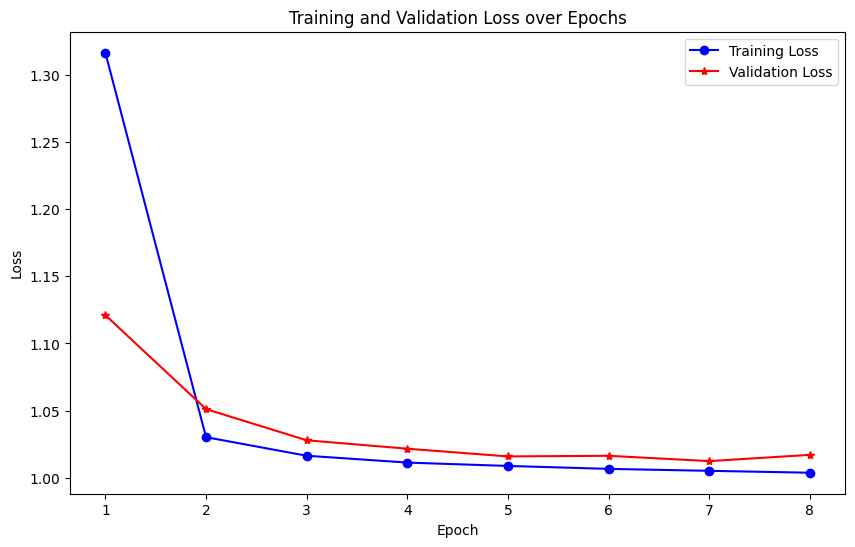

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Assuming device is already set (e.g., 'cuda' or 'cpu')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the model and move it to the correct device
inception_regression_model = InceptionTransformerRegressionModel(in_channels=ts.shape[1], out_channels=32, fc_hidden_dim=128).to(device)
inception_regression_model.apply(init_weights)
# Define loss function and optimizer
criterion = nn.MSELoss()  # Regression task uses MSE loss
optimizer = torch.optim.Adam(inception_regression_model.parameters(), lr=0.0001,weight_decay=1e-5)

# Lists to store losses
train_losses = []
val_losses = []

# Training loop
num_epochs = 8
for epoch in range(num_epochs):
    inception_regression_model.train()  # Set model to training mode

    running_train_loss = 0.0

    # Training phase
    for batch_idx, (pcc, labels, ts, target_ts) in enumerate(train_loader):
        ts, target_ts = ts.to(device), target_ts.to(device)

        optimizer.zero_grad()
        outputs = inception_regression_model(ts)
        loss = criterion(outputs, target_ts)
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item()

    # Compute the average training loss
    avg_train_loss = running_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Validation phase
    inception_regression_model.eval()  # Set model to evaluation mode
    running_val_loss = 0.0

    with torch.no_grad():  # Disable gradient computation for validation
        for batch_idx, (pcc, labels, ts, target_ts) in enumerate(val_loader):
            ts, target_ts = ts.to(device), target_ts.to(device)
            outputs = inception_regression_model(ts)
            val_loss = criterion(outputs, target_ts)
            running_val_loss += val_loss.item()

    avg_val_loss = running_val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}')

# Plot training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs+1), train_losses, 'bo-', label='Training Loss')
plt.plot(range(1, num_epochs+1), val_losses, 'r*-', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()


In [ ]:
import torch
save_dir_model = '/content/drive/My Drive/ASD_project_2024/saved_data/'

# Save the model state dictionary
model_path = save_dir_model + "inception_regression_model.pth"
torch.save(inception_regression_model.state_dict(), model_path)
print(f"Model saved to {model_path}")


Model saved to /content/drive/My Drive/ASD_project_2024/saved_data/inception_regression_model.pth


In [ ]:
inception_regression_model

InceptionTransformerRegressionModel(
  (inception_block1): InceptionBlock1D(
    (branch1): Sequential(
      (0): Conv1d(264, 32, kernel_size=(3,), stride=(1,), padding=(1,))
      (1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.1)
      (3): Dropout(p=0.5, inplace=False)
    )
    (branch2): Sequential(
      (0): Conv1d(264, 32, kernel_size=(5,), stride=(1,), padding=(12,), dilation=(3,))
      (1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.1)
      (3): Dropout(p=0.5, inplace=False)
    )
    (branch3): Sequential(
      (0): Conv1d(264, 32, kernel_size=(11,), stride=(1,), padding=(30,), dilation=(3,))
      (1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.1)
      (3): Dropout(p=0.5, inplace=False)
    )
    (branch_pool): MaxPool1d(kernel_size=3, stride=1, pa

# End of Inception Regression.

# VAE + Regression

In [ ]:
# Reading in the selected_ROIs.pkl file
with open(save_dir + 'selected_ROIs.pkl', 'rb') as f:
    selected_ROIs = pickle.load(f)

print("selected_ROIs loaded successfully")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/ASD_project_2024/saved_data/Cleaned_110ts_1segs/selected_ROIs.pkl'

In [ ]:
len(selected_ROIs)

10398

In [ ]:
class VAEWithRegression(nn.Module):
    def __init__(self, input_dim, h_dim1, h_dim2, z_dim, output_dim=264*2, dropout_rate=0.5):
        super(VAEWithRegression, self).__init__()

        # Encoder
        self.fc1 = nn.Linear(input_dim, h_dim1)
        self.fc2 = nn.Linear(h_dim1, h_dim2)
        self.fc_mu = nn.Linear(h_dim2, z_dim)
        self.fc_logvar = nn.Linear(h_dim2, z_dim)

        # Decoder
        self.fc3 = nn.Linear(z_dim, h_dim2)
        self.fc4 = nn.Linear(h_dim2, h_dim1)
        self.fc5 = nn.Linear(h_dim1, input_dim)

        # Regression head (replacing the classification head)
        self.regression_fc1 = nn.Linear(z_dim, 128)  # First regression layer
        self.regression_fc2 = nn.Linear(128, output_dim)  # Second regression layer, output_dim is 264

        # Dropout layers
        self.dropout_encoder = nn.Dropout(p=dropout_rate)  # Dropout for encoder
        self.dropout_decoder = nn.Dropout(p=dropout_rate)  # Dropout for decoder
        self.dropout_regression = nn.Dropout(p=dropout_rate)  # Dropout for regression

    def encode(self, x):
        h1 = F.leaky_relu(self.fc1(x), negative_slope=0.1)
        h1 = self.dropout_encoder(h1)  # Apply dropout in encoder
        h2 = F.leaky_relu(self.fc2(h1), negative_slope=0.1)
        h2 = self.dropout_encoder(h2)  # Apply dropout in encoder
        mu = self.fc_mu(h2)
        logvar = self.fc_logvar(h2)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h3 = F.leaky_relu(self.fc3(z), negative_slope=0.1)
        h3 = self.dropout_decoder(h3)  # Apply dropout in decoder
        h4 = F.leaky_relu(self.fc4(h3), negative_slope=0.1)
        h4 = self.dropout_decoder(h4)  # Apply dropout in decoder
        return torch.tanh(self.fc5(h4))

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        reconstruction = self.decode(z)

        # Regression forward pass
        reg_hidden = F.leaky_relu(self.regression_fc1(z), negative_slope=0.1)
        reg_hidden = self.dropout_regression(reg_hidden)  # Apply dropout in regression
        reg_output = torch.tanh(self.regression_fc2(reg_hidden)) * 4  # Scale output to [-4, 4]

        return reconstruction, mu, logvar, reg_output


In [ ]:
target_ts.shape, inputs.shape, labels.shape, targets.shape

NameError: name 'targets' is not defined

In [ ]:
for inputs, labels, targets, target_ts in train_loader:
    # Check and print shapes for each component
    print(f"Inputs shape: {inputs.shape}")
    print(f"Labels shape: {labels.shape}")
    print(f"Targets shape: {targets.shape}")
    print(f"Target TS shape: {target_ts.shape}")

    # Exit after printing the first batch
    break


Inputs shape: torch.Size([32, 10398])
Labels shape: torch.Size([32])
Targets shape: torch.Size([32, 264, 110])
Target TS shape: torch.Size([32, 528])


In [ ]:
for inputs, labels, targets, target_ts in train_loader:
    print(f"Inputs type: {type(inputs)}")
    print(f"Labels type: {type(labels)}")
    print(f"Targets type: {type(targets)}")
    print(f"Target TS type: {type(target_ts)}")
    break


Inputs type: <class 'torch.Tensor'>
Labels type: <class 'torch.Tensor'>
Targets type: <class 'torch.Tensor'>
Target TS type: <class 'torch.Tensor'>


Epoch [1/50], Train Loss: 4.6087, Recon Loss: 0.0826, KL Loss: 4.1173, Reg Loss: 4.1115, Val Loss: 1.8689
Epoch [2/50], Train Loss: 2.4585, Recon Loss: 0.0658, KL Loss: 0.8089, Reg Loss: 3.8147, Val Loss: 1.7289
Epoch [3/50], Train Loss: 2.2138, Recon Loss: 0.0592, KL Loss: 0.4069, Reg Loss: 3.8211, Val Loss: 1.6359
Epoch [4/50], Train Loss: 2.0597, Recon Loss: 0.0568, KL Loss: 0.2796, Reg Loss: 3.6703, Val Loss: 1.5658
Epoch [5/50], Train Loss: 2.0294, Recon Loss: 0.0566, KL Loss: 0.2254, Reg Loss: 3.6752, Val Loss: 1.5089
Epoch [6/50], Train Loss: 1.9374, Recon Loss: 0.0561, KL Loss: 0.1628, Reg Loss: 3.5673, Val Loss: 1.4857
Epoch [7/50], Train Loss: 1.8981, Recon Loss: 0.0539, KL Loss: 0.1396, Reg Loss: 3.5209, Val Loss: 1.4354
Epoch [8/50], Train Loss: 1.8449, Recon Loss: 0.0528, KL Loss: 0.1208, Reg Loss: 3.4392, Val Loss: 1.4672
Epoch [9/50], Train Loss: 1.8399, Recon Loss: 0.0532, KL Loss: 0.1202, Reg Loss: 3.4291, Val Loss: 1.3821
Epoch [10/50], Train Loss: 1.7887, Recon Loss:

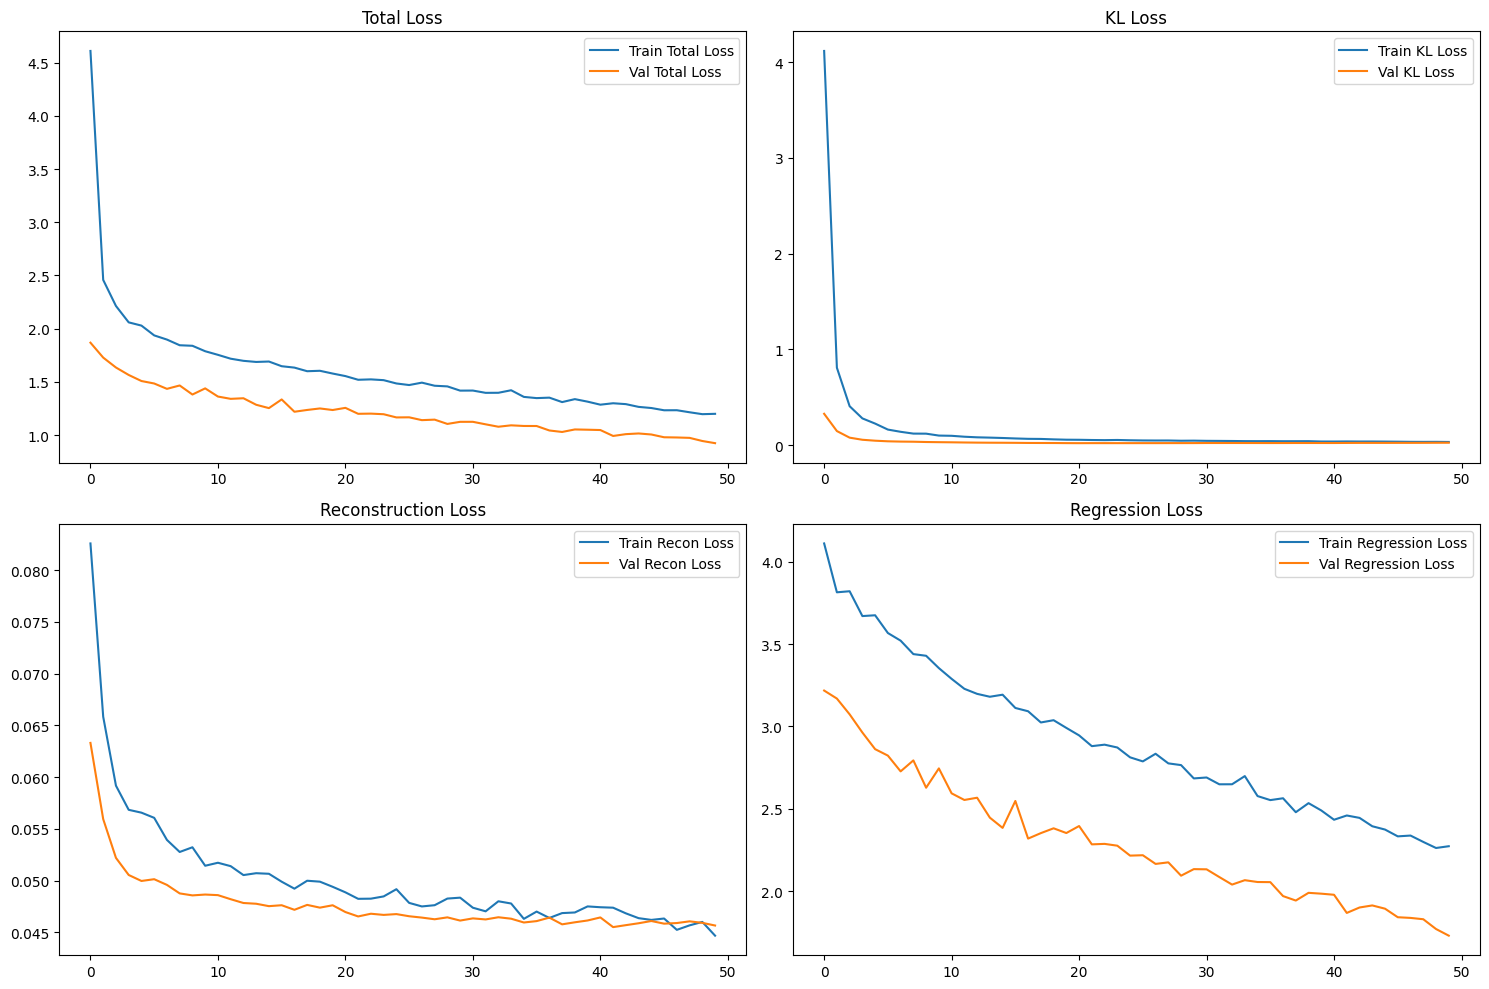

In [ ]:
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
import torch.nn.functional as F

w_kld = 0.6
w_regression = 0.5
num_epochs =50

input_dim = X_pcc_combined.shape[1]
h_dim1 = 512
h_dim2 = 256
z_dim = 128
learning_rate = 0.0001
patience = 5

# Model, optimizer, and loss initialization
model = VAEWithRegression(input_dim=input_dim, h_dim1=h_dim1, h_dim2=h_dim2, z_dim=z_dim, output_dim=264*2, dropout_rate=0.3)
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)
model.apply(init_weights)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Losses storage for visualization
train_total_losses, val_total_losses = [], []
train_kl_losses, val_kl_losses = [], []
train_recon_losses, val_recon_losses = [], []
train_regression_losses, val_regression_losses = [], []

# Early stopping variables
best_val_loss = float('inf')
patience_counter = 0

# Training loop
for epoch in range(num_epochs):
    model.train()
    train_loss, kl_loss_sum, recon_loss_sum, regression_loss_sum = 0, 0, 0, 0

    for inputs, labels, _, target_ts in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device).float().unsqueeze(1)  # Ensure labels have shape [batch_size, 1]
        target_ts = target_ts.to(device).float()
        # Forward pass
        reconstruction, mu, logvar, reg_output = model(inputs)

        # Loss calculations
        recon_loss = F.mse_loss(reconstruction, inputs, reduction='mean')
        kl_loss = -0.5 * torch.mean(torch.sum(1 + logvar - mu.pow(2) - logvar.exp(), dim=1))

        # Modify targets to have shape [batch_size, 264] by averaging over the last dimension
       # targets = targets.mean(dim=-1)

        regression_loss = F.mse_loss(reg_output, target_ts, reduction='mean')

        # Total loss
        total_loss = recon_loss + w_kld * kl_loss + w_regression * regression_loss

        # Backward pass and optimization
        optimizer.zero_grad()
        total_loss.backward()
        optimizer.step()

        # Accumulate losses for this epoch
        train_loss += total_loss.item()
        kl_loss_sum += kl_loss.item()
        recon_loss_sum += recon_loss.item()
        regression_loss_sum += regression_loss.item()

    # Store average loss per batch for plotting
    train_total_losses.append(train_loss / len(train_loader))
    train_kl_losses.append(kl_loss_sum / len(train_loader))
    train_recon_losses.append(recon_loss_sum / len(train_loader))
    train_regression_losses.append(regression_loss_sum / len(train_loader))

    # Validation loop
    model.eval()
    val_loss, val_kl_loss_sum, val_recon_loss_sum, val_regression_loss_sum = 0, 0, 0, 0

    with torch.no_grad():
        for inputs, labels, _, target_ts in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device).float().unsqueeze(1)
            target_ts = target_ts.to(device).float()
            # Forward pass
            reconstruction, mu, logvar, reg_output = model(inputs)

            # Loss calculations
            recon_loss = F.mse_loss(reconstruction, inputs, reduction='mean')
            kl_loss = -0.5 * torch.mean(torch.sum(1 + logvar - mu.pow(2) - logvar.exp(), dim=1))

            regression_loss = F.mse_loss(reg_output, target_ts, reduction='mean')
            total_loss = recon_loss + w_kld * kl_loss + w_regression * regression_loss

            # Accumulate losses for this epoch
            val_loss += total_loss.item()
            val_kl_loss_sum += kl_loss.item()
            val_recon_loss_sum += recon_loss.item()
            val_regression_loss_sum += regression_loss.item()

    # Store average validation loss per batch for plotting
    val_total_losses.append(val_loss / len(val_loader))
    val_kl_losses.append(val_kl_loss_sum / len(val_loader))
    val_recon_losses.append(val_recon_loss_sum / len(val_loader))
    val_regression_losses.append(val_regression_loss_sum / len(val_loader))

    # Print losses
    print(f"Epoch [{epoch + 1}/{num_epochs}], "
          f"Train Loss: {train_total_losses[-1]:.4f}, Recon Loss: {train_recon_losses[-1]:.4f}, "
          f"KL Loss: {train_kl_losses[-1]:.4f}, Reg Loss: {train_regression_losses[-1]:.4f}, "
          f"Val Loss: {val_total_losses[-1]:.4f}")

    # Early Stopping Check
    if val_total_losses[-1] < best_val_loss:
        best_val_loss = val_total_losses[-1]
        patience_counter = 0
        torch.save(model.state_dict(), 'best_model.pth')
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered.")
            break

# Plotting loss curves for training and validation
plt.figure(figsize=(15, 10))

# Total Losses Plot
plt.subplot(2, 2, 1)
plt.plot(train_total_losses, label='Train Total Loss')
plt.plot(val_total_losses, label='Val Total Loss')
plt.legend()
plt.title("Total Loss")

# KL Losses Plot
plt.subplot(2, 2, 2)
plt.plot(train_kl_losses, label='Train KL Loss')
plt.plot(val_kl_losses, label='Val KL Loss')
plt.legend()
plt.title("KL Loss")

# Reconstruction Losses Plot
plt.subplot(2, 2, 3)
plt.plot(train_recon_losses, label='Train Recon Loss')
plt.plot(val_recon_losses, label='Val Recon Loss')
plt.legend()
plt.title("Reconstruction Loss")

# Regression Losses Plot
plt.subplot(2, 2, 4)
plt.plot(train_regression_losses, label='Train Regression Loss')
plt.plot(val_regression_losses, label='Val Regression Loss')
plt.legend()
plt.title("Regression Loss")

plt.tight_layout()
plt.show()


In [ ]:
inputs.shape

torch.Size([8, 11350])

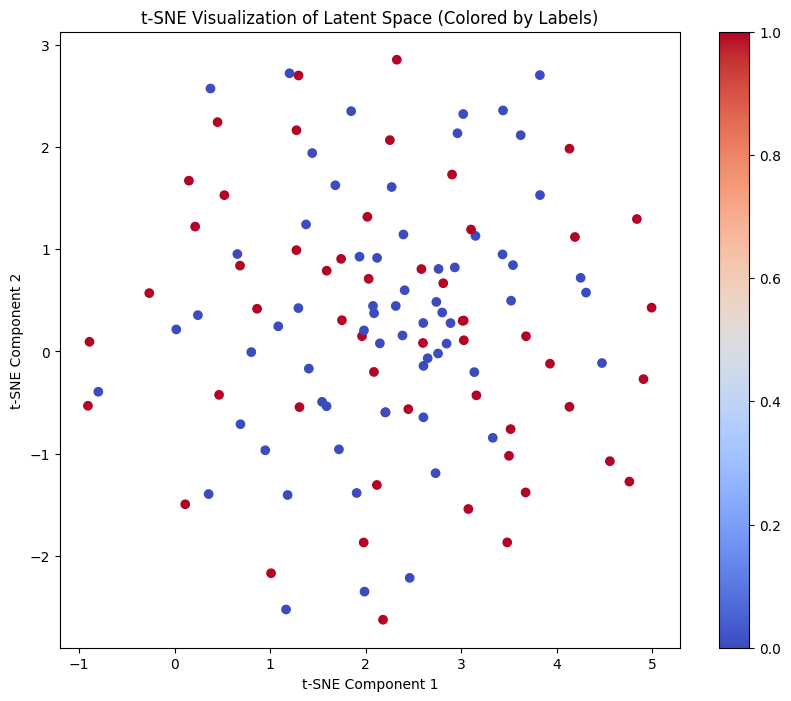

In [ ]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

# Initialize lists to store latent variables and labels for t-SNE
latent_vars = []
labels_list = []

# Extract latent variables from validation data (val_loader)
model.eval()
with torch.no_grad():
    for inputs, labels, _, _ in test_loader:
        inputs = inputs.to(device)

        # Forward pass to get latent variables (mu)
        reconstruction, mu, logvar, reg_output = model(inputs)

        # Store mu (latent variable) and corresponding labels for t-SNE visualization
        latent_vars.append(mu.cpu().numpy())  # Move to CPU and convert to numpy
        labels_list.append(labels.cpu().numpy())  # Store the labels (class info if available)

# Convert to numpy arrays for t-SNE
latent_vars = np.concatenate(latent_vars, axis=0)  # Shape: [num_samples, z_dim]
labels_list = np.concatenate(labels_list, axis=0)  # Shape: [num_samples]

# Apply t-SNE to reduce dimensions to 2D
tsne = TSNE(n_components=2, random_state=42)
latent_2d = tsne.fit_transform(latent_vars)

# Plot the t-SNE visualization with labels for coloring
plt.figure(figsize=(10, 8))
scatter = plt.scatter(latent_2d[:, 0], latent_2d[:, 1], c=labels_list, cmap='coolwarm')
plt.colorbar(scatter)  # Show color bar for the labels
plt.title("t-SNE Visualization of Latent Space (Colored by Labels)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()


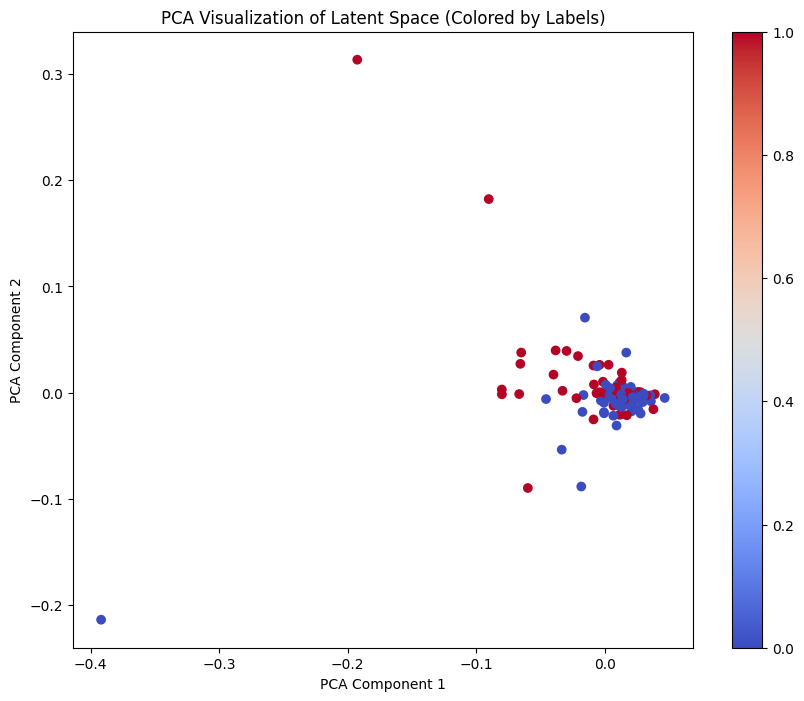

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Initialize lists to store latent variables and labels for PCA
latent_vars = []
labels_list = []

# Extract latent variables from validation data (val_loader)
model.eval()
with torch.no_grad():
    for inputs, labels, _, _ in test_loader:
        inputs = inputs.to(device)

        # Forward pass to get latent variables (mu)
        reconstruction, mu, logvar, reg_output = model(inputs)

        # Store mu (latent variable) and corresponding labels for PCA visualization
        latent_vars.append(mu.cpu().numpy())  # Move to CPU and convert to numpy
        labels_list.append(labels.cpu().numpy())  # Store the labels (class info if available)

# Convert to numpy arrays for PCA
latent_vars = np.concatenate(latent_vars, axis=0)  # Shape: [num_samples, z_dim]
labels_list = np.concatenate(labels_list, axis=0)  # Shape: [num_samples]

# Apply PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
latent_2d = pca.fit_transform(latent_vars)

# Plot the PCA visualization with labels for coloring
plt.figure(figsize=(10, 8))
scatter = plt.scatter(latent_2d[:, 0], latent_2d[:, 1], c=labels_list, cmap='coolwarm')
plt.colorbar(scatter)  # Show color bar for the labels
plt.title("PCA Visualization of Latent Space (Colored by Labels)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


In [ ]:
import torch
save_dir_model = '/content/drive/My Drive/ASD_project_2024/saved_data/'

# Save the model state dictionary
model_path = save_dir_model + "VAE_regression_model.pth"
torch.save(model.state_dict(), model_path)
print(f"Model saved to {model_path}")

Model saved to /content/drive/My Drive/ASD_project_2024/saved_data/VAE_regression_model.pth


In [ ]:
model

VAEWithRegression(
  (fc1): Linear(in_features=5628, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc_mu): Linear(in_features=256, out_features=128, bias=True)
  (fc_logvar): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=512, bias=True)
  (fc5): Linear(in_features=512, out_features=5628, bias=True)
  (regression_fc1): Linear(in_features=128, out_features=128, bias=True)
  (regression_fc2): Linear(in_features=128, out_features=264, bias=True)
  (dropout_encoder): Dropout(p=0.3, inplace=False)
  (dropout_decoder): Dropout(p=0.3, inplace=False)
  (dropout_regression): Dropout(p=0.3, inplace=False)
)

# VAE + Inception
# Concatenate

To construct the new model that combines the output of the VAE encoder and InceptionBlock2, and then applies a transformer encoder followed by a fully connected (FC) layer for binary classification, follow these steps:

Model Overview:

VAE Encoder: This will take the pcc input and output the latent space representation.

Inception Block 2: This will take the ts input and output a feature map.

Concatenate Latent Vectors: The output of the VAE encoder (latent vector of size 128) and the output of InceptionBlock2 (size 128 after the convolutional layers) will be concatenated.
Transformer Encoder: Apply a transformer encoder layer to the concatenated vector to capture sequential dependencies.
FC Layer: The final classification layer will output a binary prediction (0 or 1).
Steps for Implementation:
Define the Model Class: We will define a class that accepts the pcc and ts inputs, processes them through the VAE and Inception models, concatenates their outputs, and then applies a transformer encoder followed by a classification layer.

Transformer Encoder Layer: We'll use a multi-head attention mechanism as part of the transformer encoder.

Final Classifier: We'll use a fully connected (FC) layer to output binary labels.

In [ ]:
# Nov. 11
import torch
import torch.nn as nn
import torch.nn.functional as F

# Step 1: Load the pretrained VAE model state dict
pretrained_vae_state = torch.load('/content/drive/My Drive/ASD_project_2024/saved_data/VAE_regression_model.pth', weights_only=True)


# Step 2: Filter out only the encoder part of the state dict
encoder_state_dict_vae = {k: v for k, v in pretrained_vae_state.items() if k in ['fc1.weight', 'fc1.bias',
                                                                             'fc2.weight', 'fc2.bias',
                                                                             'fc_mu.weight', 'fc_mu.bias',
                                                                             'fc_logvar.weight', 'fc_logvar.bias']}

# Step 3: Define the VAE Encoder with only the selected layers
class VAEEncoder(nn.Module):
    def __init__(self, input_dim, h_dim1, h_dim2, z_dim, dropout_rate=0.3):
        super(VAEEncoder, self).__init__()
        self.fc1 = nn.Linear(input_dim, h_dim1)
        self.fc2 = nn.Linear(h_dim1, h_dim2)
        self.fc_mu = nn.Linear(h_dim2, z_dim)
        self.fc_logvar = nn.Linear(h_dim2, z_dim)

        # Dropout layer for regularization
        self.dropout = nn.Dropout(dropout_rate)

    def encode(self, x):
        h1 = F.relu(self.fc1(x))
        h1 = self.dropout(h1)  # Apply dropout after the first layer
        h2 = F.relu(self.fc2(h1))
        h2 = self.dropout(h2)  # Apply dropout after the second layer
        mu = self.fc_mu(h2)
        logvar = self.fc_logvar(h2)
        return mu, logvar

    def forward(self, x):
        mu, logvar = self.encode(x)
        return mu, logvar


# Step 4: Initialize the VAE Encoder with the pretrained weights
vae_encoder = VAEEncoder(input_dim, h_dim1, h_dim2, z_dim)
vae_encoder.load_state_dict(encoder_state_dict_vae, strict=True)

'''# Enable gradients on the encoder layers for fine-tuning
for param in vae_encoder.parameters():
    param.requires_grad = True'''

'# Enable gradients on the encoder layers for fine-tuning\nfor param in vae_encoder.parameters():\n    param.requires_grad = True'

In [ ]:
class CombinedModel(nn.Module):
    def __init__(self, vae_encoder, inception_encoder, z_dim, transformer_dim, num_heads, num_layers, fc_out_dim=1):
        super(CombinedModel, self).__init__()

        # Pretrained encoders
        self.vae_encoder = vae_encoder
        self.inception_encoder = inception_encoder
# Unfreeze pretrained encoder models for fine-tuning
        for param in self.vae_encoder.parameters():
            param.requires_grad = True  # Adjusted for fine-tuning based on your requirement
        for param in self.inception_encoder.parameters():
            param.requires_grad = True

        # Transformer Encoder with Positional Encoding
        self.positional_encoding = PositionalEncoding(d_model=z_dim)
        self.transformer_encoder_layer = nn.TransformerEncoderLayer(
            d_model=z_dim,
            nhead=num_heads,
            dim_feedforward=transformer_dim
        )
        self.transformer_encoder = nn.TransformerEncoder(self.transformer_encoder_layer, num_layers=num_layers)

        # Normalization layers for encoder outputs
        self.vae_norm = nn.LayerNorm(z_dim)
        self.inception_norm = nn.LayerNorm(z_dim)

        # Fully connected layers for binary classification
        self.fc1 = nn.Linear(2 * z_dim, 64)
        self.fc2 = nn.Linear(64, fc_out_dim)  # Binary classification output

    def forward(self, pcc, ts):
        # Pass through the VAE encoder and extract latent representation
        mu_vae, logvar_vae = self.vae_encoder.encode(pcc)
        vae_out = mu_vae

        # Pass through the Inception encoder to get its latent feature vector
        inception_out = self.inception_encoder(ts)

        # Apply positional encoding before passing to Transformer
        vae_out = self.positional_encoding(vae_out.unsqueeze(1)).squeeze(1)  # Positional encoding for VAE output
        #inception_out = self.positional_encoding(inception_out.unsqueeze(1)).squeeze(1)  # For Inception output

        # Transformer Encoder for both encoded outputs
        vae_out = self.transformer_encoder(vae_out.unsqueeze(1)).squeeze(1)
        #inception_out = self.transformer_encoder(inception_out.unsqueeze(1)).squeeze(1)

        # Normalize the outputs
        vae_out = self.vae_norm(vae_out)
        inception_out = self.inception_norm(inception_out)

        # Concatenate normalized outputs
        combined = torch.cat([vae_out, inception_out], dim=1)

        # Fully connected layers for binary classification
        fc1_out = F.relu(self.fc1(combined))
        logits = self.fc2(fc1_out)

        return logits

In [ ]:
# Inception Block with dilated convolutions
class InceptionBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(InceptionBlock1D, self).__init__()

        # Branch 1: Regular 1D convolution with kernel size 3 (no dilation)
        self.branch1 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=3, padding=1),  # Standard conv with kernel=3
            nn.BatchNorm1d(out_channels),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Dropout(0.5)
        )

        # Branch 2: Dilated 1D convolution with kernel size 5 and dilation=3
        self.branch2 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=5, padding=12, dilation=3),  # Adjusted padding for dilation=3
            nn.BatchNorm1d(out_channels),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Dropout(0.5)
        )

        # Branch 3: Dilated 1D convolution with kernel size 11 and dilation=3
        self.branch3 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=11, padding=30, dilation=3),  # Updated dilation to 3
            nn.BatchNorm1d(out_channels),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Dropout(0.5)
        )

        # Branch Pool: Max pooling and 1x1 convolution
        self.branch_pool = nn.MaxPool1d(kernel_size=3, stride=1, padding=1)
        self.branch_pool_conv = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=1),
            nn.BatchNorm1d(out_channels),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Dropout(0.5)
        )

    def forward(self, x):
        # Get the outputs from all branches
        branch1_out = self.branch1(x)
        branch2_out = self.branch2(x)
        branch3_out = self.branch3(x)
        branch_pool_out = self.branch_pool_conv(self.branch_pool(x))

        # Ensure that all outputs have the same sequence length by applying padding
        target_len = branch1_out.size(2)

        branch2_out = F.pad(branch2_out, (0, target_len - branch2_out.size(2)))
        branch3_out = F.pad(branch3_out, (0, target_len - branch3_out.size(2)))
        branch_pool_out = F.pad(branch_pool_out, (0, target_len - branch_pool_out.size(2)))

        # Concatenate the outputs from all branches
        outputs = torch.cat([branch1_out, branch2_out, branch3_out, branch_pool_out], dim=1)
        return outputs


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import TransformerEncoder, TransformerEncoderLayer

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-torch.log(torch.tensor(10000.0)) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(1)  # Shape: [max_len, 1, d_model]
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(0), :]
        return x

class InceptionEncoder(nn.Module):
    def __init__(self, in_channels, out_channels, num_encoder_layers=2, nhead=16):
        super(InceptionEncoder, self).__init__()

        # First and second Inception blocks
        self.inception_block1 = InceptionBlock1D(in_channels, out_channels)
        self.inception_block2 = InceptionBlock1D(out_channels * 4, out_channels)

        # Positional Encoding
        self.positional_encoding = PositionalEncoding(d_model=out_channels * 4)

        # Transformer Encoder
        encoder_layer = TransformerEncoderLayer(d_model=out_channels * 4, nhead=nhead, dim_feedforward=512)
        self.transformer_encoder = TransformerEncoder(encoder_layer, num_layers=num_encoder_layers)

    def forward(self, x):
        # Pass through Inception blocks
        x = self.inception_block1(x)
        x = self.inception_block2(x)  # Shape: [batch, channels, seq_len]

        # Permute for Transformer encoder (requires shape [seq_len, batch, embedding_dim])
        x = x.permute(2, 0, 1)

        # Apply positional encoding
        x = self.positional_encoding(x)

        # Pass through Transformer encoder
        x = self.transformer_encoder(x)  # Shape: [seq_len, batch, embedding_dim]

        # Permute back and apply global average pooling
        x = x.permute(1, 2, 0)
        x = F.adaptive_avg_pool1d(x, 1).squeeze(-1)  # Shape: [batch, embedding_dim]

        return x  # Encoded output representation

# Load pretrained weights for the Inception + Transformer model
pretrained_dict = torch.load('/content/drive/My Drive/ASD_project_2024/saved_data/inception_regression_model.pth', weights_only=True, map_location=device)
#pretrained_vae_state = torch.load('/content/drive/My Drive/ASD_project_2024/saved_data/VAE_regression_model.pth', weights_only=True)

# Initialize the InceptionEncoder model
inception_encoder = InceptionEncoder(in_channels=264, out_channels=32)

# Load matching pretrained weights into InceptionEncoder
model_dict = inception_encoder.state_dict()
pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict and v.size() == model_dict[k].size()}
model_dict.update(pretrained_dict)
inception_encoder.load_state_dict(model_dict)

# Check the loaded model structure
#print(inception_encoder)



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


<All keys matched successfully>

In [ ]:
w_kld = 0.5
w_regression = 0.5
input_dim = X_pcc_combined.shape[1]
h_dim1 = 512
h_dim2 = 256
z_dim = 128
learning_rate = 0.0001
patience = 5

# Combine two pretrained models.

In [ ]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.encoding = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        self.encoding[:, 0::2] = torch.sin(position * div_term)
        self.encoding[:, 1::2] = torch.cos(position * div_term)
        self.encoding = self.encoding.unsqueeze(0)  # Shape: [1, max_len, d_model]

    def forward(self, x):
        # Ensure positional encoding is on the same device as input x
        self.encoding = self.encoding.to(x.device)
        x = x + self.encoding[:, :x.size(1), :]
        return x


In [ ]:
#new



Epoch 1/10, Train Loss: 1.3833, Train Acc: 0.5195, Val Loss: 0.1250, Val Acc: 0.5424
Epoch 2/10, Train Loss: 1.3600, Train Acc: 0.5556, Val Loss: 0.1225, Val Acc: 0.5424
Epoch 3/10, Train Loss: 1.2858, Train Acc: 0.6970, Val Loss: 0.1183, Val Acc: 0.5593
Epoch 4/10, Train Loss: 1.1039, Train Acc: 0.7605, Val Loss: 0.1008, Val Acc: 0.6949
Epoch 5/10, Train Loss: 0.7269, Train Acc: 0.8788, Val Loss: 0.1024, Val Acc: 0.7458
Epoch 6/10, Train Loss: 0.3923, Train Acc: 0.9394, Val Loss: 0.1183, Val Acc: 0.7203
Epoch 7/10, Train Loss: 0.1638, Train Acc: 0.9870, Val Loss: 0.1307, Val Acc: 0.7288
Epoch 8/10, Train Loss: 0.0629, Train Acc: 0.9986, Val Loss: 0.1597, Val Acc: 0.6949
Epoch 9/10, Train Loss: 0.0929, Train Acc: 0.9870, Val Loss: 0.1471, Val Acc: 0.7373
Epoch 10/10, Train Loss: 0.0618, Train Acc: 0.9913, Val Loss: 0.1662, Val Acc: 0.7288
Test Accuracy: 0.7288


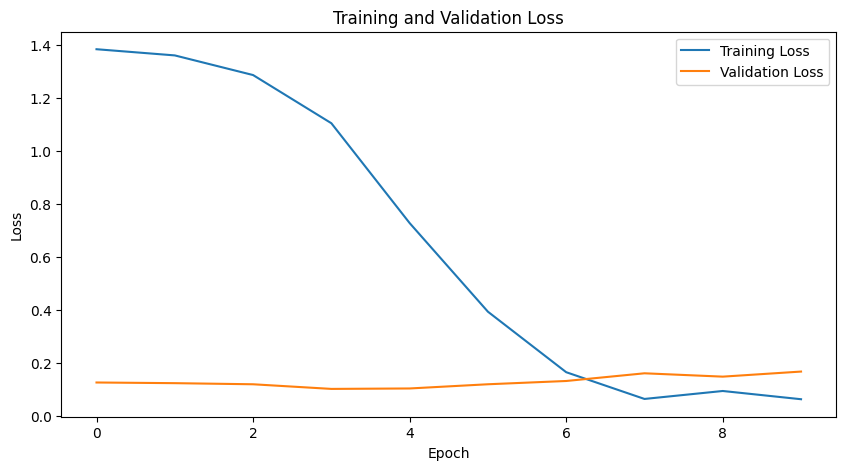

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import math
import torch
import torch.nn as nn

# Initialize Combined Model
combined_model = CombinedModel(
    vae_encoder=vae_encoder,               # Pretrained VAE encoder
    inception_encoder=inception_encoder,   # Pretrained Inception encoder
    z_dim=128,                             # Adjusted latent dimension of VAE
    transformer_dim=2*128,                 # Dimension of transformer feedforward layers
    num_heads=16,                           # Number of heads for multi-head attention
    num_layers=2,                          # Number of transformer layers
    fc_out_dim=1                           # Output dimension for binary classification (1 for logits)
)

# Move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
combined_model.to(device)

# Loss function and optimizer
criterion = nn.BCEWithLogitsLoss()  # For binary classification logits
optimizer = optim.Adam(combined_model.parameters(), lr=1e-4, weight_decay=1e-4)

# Training loop parameters
num_epochs = 10
train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], []

for epoch in range(num_epochs):
    combined_model.train()
    total_train_loss, correct_train, total_train = 0, 0, 0

    # Training phase
    for batch_idx, (pcc, labels, ts, _) in enumerate(train_vae_loader):
        pcc, ts, labels = pcc.to(device), ts.to(device), labels.to(device).float()

        optimizer.zero_grad()

        # Forward pass
        outputs = combined_model(pcc, ts)
        loss = criterion(outputs, labels.unsqueeze(1))

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Compute metrics
        total_train_loss += loss.item()
        predicted = torch.round(torch.sigmoid(outputs))
        correct_train += (predicted.cpu() == labels.cpu().unsqueeze(1)).sum().item()
        total_train += labels.size(0)

    train_losses.append(total_train_loss / len(VAE_loader))
    train_accuracies.append(correct_train / total_train)

    # Validation phase
    combined_model.eval()
    total_val_loss, correct_val, total_val = 0, 0, 0

    with torch.no_grad():
        for pcc, labels, ts, _ in test_loader:
            pcc, ts, labels = pcc.to(device), ts.to(device), labels.to(device).float()
            outputs = combined_model(pcc, ts)
            loss = criterion(outputs, labels.unsqueeze(1))

            total_val_loss += loss.item()
            predicted = torch.round(torch.sigmoid(outputs))
            correct_val += (predicted.cpu() == labels.cpu().unsqueeze(1)).sum().item()
            total_val += labels.size(0)

    val_losses.append(total_val_loss / len(train_vae_loader))
    val_accuracies.append(correct_val / total_val)

    print(f'Epoch {epoch + 1}/{num_epochs}, '
          f'Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.4f}, '
          f'Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_accuracies[-1]:.4f}')

# Test phase
combined_model.eval()
correct_test, total_test = 0, 0
test_outputs, test_labels = [], []

with torch.no_grad():
    for pcc, labels, ts, _ in test_loader:
        pcc, ts, labels = pcc.to(device), ts.to(device), labels.to(device).float()
        outputs = combined_model(pcc, ts)

        predicted = torch.round(torch.sigmoid(outputs))
        correct_test += (predicted.cpu() == labels.cpu().unsqueeze(1)).sum().item()
        total_test += labels.size(0)

        # Store predictions and labels for evaluation
        test_outputs.append(outputs.cpu())
        test_labels.append(labels.cpu())

test_accuracy = correct_test / total_test
print(f'Test Accuracy: {test_accuracy:.4f}')

# Plot Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [ ]:
# Training loop parameters
num_epochs = 5
train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], []

for epoch in range(num_epochs):
    combined_model.train()
    total_train_loss, correct_train, total_train = 0, 0, 0

    # Training phase
    for batch_idx, (pcc, labels, ts, _) in enumerate(train_vae_loader):
        pcc, ts, labels = pcc.to(device), ts.to(device), labels.to(device).float()

        optimizer.zero_grad()

        # Forward pass
        outputs = combined_model(pcc, ts)
        loss = criterion(outputs, labels.unsqueeze(1))

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Compute metrics
        total_train_loss += loss.item()
        predicted = torch.round(torch.sigmoid(outputs))
        correct_train += (predicted.cpu() == labels.cpu().unsqueeze(1)).sum().item()
        total_train += labels.size(0)

    train_losses.append(total_train_loss / len(train_vae_loader))
    train_accuracies.append(correct_train / total_train)

    # Validation phase
    combined_model.eval()
    total_val_loss, correct_val, total_val = 0, 0, 0

    with torch.no_grad():
        for pcc, labels, ts, _ in test_loader:
            pcc, ts, labels = pcc.to(device), ts.to(device), labels.to(device).float()
            outputs = combined_model(pcc, ts)
            loss = criterion(outputs, labels.unsqueeze(1))

            total_val_loss += loss.item()
            predicted = torch.round(torch.sigmoid(outputs))
            correct_val += (predicted.cpu() == labels.cpu().unsqueeze(1)).sum().item()
            total_val += labels.size(0)

    val_losses.append(total_val_loss / len(test_loader))
    val_accuracies.append(correct_val / total_val)

    print(f'Epoch {epoch + 1}/{num_epochs}, '
          f'Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.4f}, '
          f'Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_accuracies[-1]:.4f}')

# Test phase
combined_model.eval()
correct_test, total_test = 0, 0
test_outputs, test_labels = [], []

with torch.no_grad():
    for pcc, labels, ts, _ in test_loader:
        pcc, ts, labels = pcc.to(device), ts.to(device), labels.to(device).float()
        outputs = combined_model(pcc, ts)

        predicted = torch.round(torch.sigmoid(outputs))
        correct_test += (predicted.cpu() == labels.cpu().unsqueeze(1)).sum().item()
        total_test += labels.size(0)

        # Store predictions and labels for evaluation
        test_outputs.append(outputs.cpu())
        test_labels.append(labels.cpu())

test_accuracy = correct_test / total_test
print(f'Test Accuracy: {test_accuracy:.4f}')


Epoch 1/5, Train Loss: 0.0197, Train Acc: 0.9971, Val Loss: 0.9246, Val Acc: 0.7458
Epoch 2/5, Train Loss: 0.0188, Train Acc: 0.9971, Val Loss: 0.9393, Val Acc: 0.7203
Epoch 3/5, Train Loss: 0.0194, Train Acc: 0.9928, Val Loss: 0.8902, Val Acc: 0.7288
Epoch 4/5, Train Loss: 0.0183, Train Acc: 0.9942, Val Loss: 1.0439, Val Acc: 0.7458
Epoch 5/5, Train Loss: 0.0263, Train Acc: 0.9913, Val Loss: 0.9770, Val Acc: 0.6864
Test Accuracy: 0.7119


In [ ]:
avg_accuracy = 0  # Initialize the variable to accumulate accuracy across iterations

for k in range(10):
    combined_model.eval()
    correct_test, total_test = 0, 0
    test_outputs, test_labels = [], []

    with torch.no_grad():
        for pcc, labels, ts, _ in test_loader:
            pcc, ts, labels = pcc.to(device), ts.to(device), labels.to(device).float()
            outputs = combined_model(pcc, ts)

            predicted = torch.round(torch.sigmoid(outputs))
            correct_test += (predicted.cpu() == labels.cpu().unsqueeze(1)).sum().item()
            total_test += labels.size(0)

            # Store predictions and labels for evaluation
            test_outputs.append(outputs.cpu())
            test_labels.append(labels.cpu())

    test_accuracy = correct_test / total_test
    avg_accuracy += test_accuracy  # Accumulate accuracy
    print(f'Iteration {k + 1} Test Accuracy: {test_accuracy:.4f}')

# Calculate and output the average accuracy
avg_accuracy /= 10
print(f'Average Test Accuracy: {avg_accuracy:.4f}')


Iteration 1 Test Accuracy: 0.7203
Iteration 2 Test Accuracy: 0.7288
Iteration 3 Test Accuracy: 0.7203
Iteration 4 Test Accuracy: 0.7288
Iteration 5 Test Accuracy: 0.7373
Iteration 6 Test Accuracy: 0.7288
Iteration 7 Test Accuracy: 0.7458
Iteration 8 Test Accuracy: 0.7119
Iteration 9 Test Accuracy: 0.7373
Iteration 10 Test Accuracy: 0.7203
Average Test Accuracy: 0.7280


In [ ]:
# Visualize VAE Latent Space
def plot_latent_space(vae_encoder, loader, num_samples=50, use_pca=True):
    vae_encoder.eval()
    latents, labels = [], []

    with torch.no_grad():
        for pcc, label, _, _ in loader:
            pcc = pcc.to(device)
            mu, logvar = vae_encoder.encode(pcc)
            latents.append(mu.cpu())
            labels.append(label)

    latents = torch.cat(latents)[:num_samples]
    labels = torch.cat(labels)[:num_samples]

    if use_pca:
        latents_2d = PCA(n_components=2).fit_transform(latents)
    else:
        latents_2d = TSNE(n_components=2).fit_transform(latents)

    plt.figure(figsize=(8, 8))
    scatter = plt.scatter(latents_2d[:, 0], latents_2d[:, 1], c=labels, cmap='coolwarm', alpha=0.7)
    plt.colorbar(scatter, label='Class Label')
    plt.xlabel('Latent Dimension 1')
    plt.ylabel('Latent Dimension 2')
    plt.title('VAE Latent Space Visualization')
    plt.show()



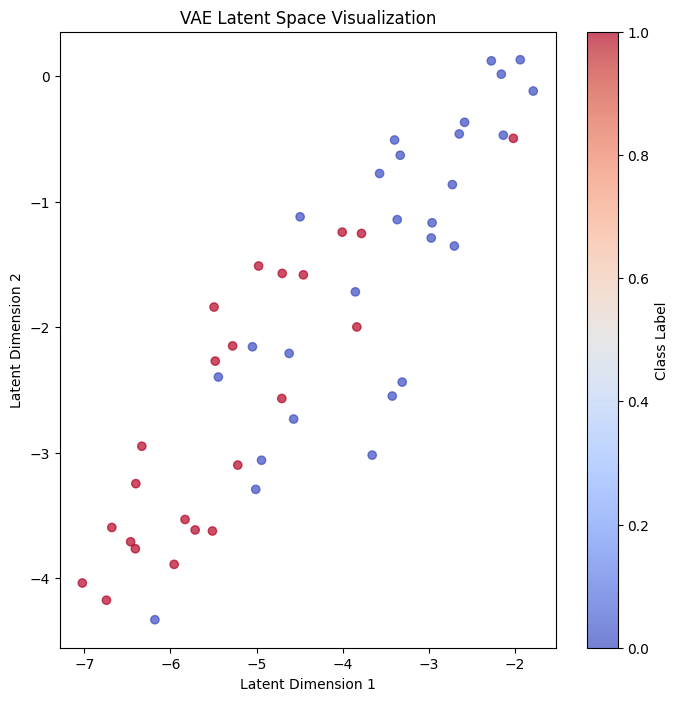

In [ ]:
# Plot the latent space using VAE
plot_latent_space(vae_encoder, test_loader, num_samples=50, use_pca=False)

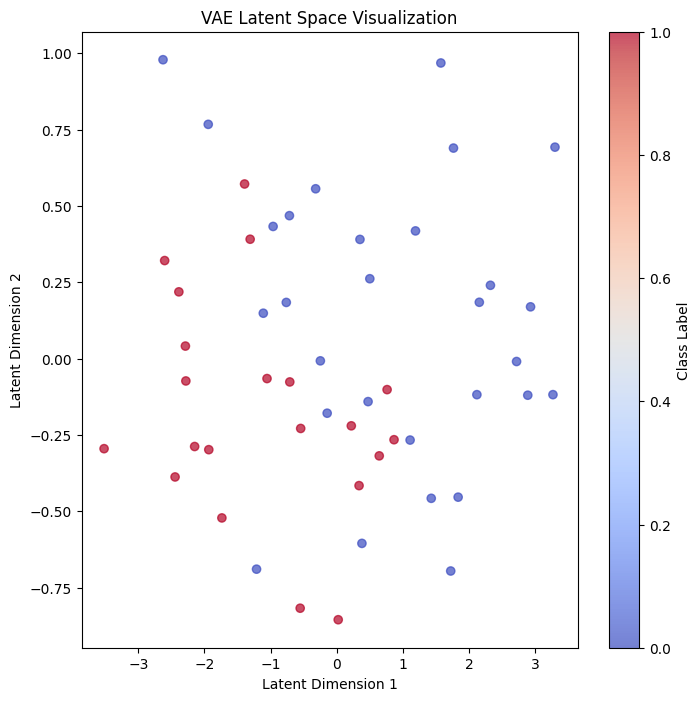

In [ ]:
plot_latent_space(vae_encoder, test_loader, num_samples=50, use_pca=True)

# Auxilary Regression + Classification Task


In [ ]:
import torch.nn.functional as F

class CombinedModel(nn.Module):
    def __init__(self, vae_encoder, inception_encoder, z_dim, transformer_dim, num_heads, num_layers, fc_out_dim=1, reg_out_dim=264):
        super(CombinedModel, self).__init__()

        # Pretrained encoders
        self.vae_encoder = vae_encoder
        self.inception_encoder = inception_encoder

        # Positional Encoding
        self.positional_encoding = PositionalEncoding(d_model=z_dim)

        # Transformer Encoder
        self.transformer_encoder_layer = nn.TransformerEncoderLayer(
            d_model=z_dim,
            nhead=num_heads,
            dim_feedforward=transformer_dim
        )
        self.transformer_encoder = nn.TransformerEncoder(self.transformer_encoder_layer, num_layers=num_layers)

        # Normalization layers for encoder outputs
        self.vae_norm = nn.LayerNorm(z_dim)
        self.inception_norm = nn.LayerNorm(z_dim)

        # Fully connected layers for binary classification
        self.fc1 = nn.Linear(2 * z_dim, 64)
        self.classification_head = nn.Linear(64, fc_out_dim)  # Binary classification output

        # Fully connected layer for regression output
        self.regression_head = nn.Linear(64, reg_out_dim)  # 264-dimensional regression output

    def forward(self, pcc, ts):
        # VAE encoder output
        mu_vae, logvar_vae = self.vae_encoder.encode(pcc)
        vae_out = mu_vae

        # Inception encoder output
        inception_out = self.inception_encoder(ts)

        # Apply positional encoding and Transformer encoder to VAE output
        vae_out = self.positional_encoding(vae_out.unsqueeze(1)).squeeze(1)
        vae_out = self.transformer_encoder(vae_out.unsqueeze(1)).squeeze(1)

        # Normalize the outputs
        vae_out = self.vae_norm(vae_out)
        inception_out = self.inception_norm(inception_out)

        # Concatenate and pass through fully connected layer
        combined = torch.cat([vae_out, inception_out], dim=1)
        fc1_out = F.relu(self.fc1(combined))

        # Separate heads for classification and regression
        logits = self.classification_head(fc1_out)
        regression_output = self.regression_head(fc1_out)

        return logits, regression_output


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Modified CombinedModel with Auxiliary Regression
class CombinedModel(nn.Module):
    def __init__(self, vae_encoder, inception_encoder, z_dim, transformer_dim, num_heads, num_layers, fc_out_dim=1, regression_dim=264):
        super(CombinedModel, self).__init__()

        # Pretrained encoders
        self.vae_encoder = vae_encoder
        self.inception_encoder = inception_encoder

        # Transformer Encoder with Positional Encoding
        self.positional_encoding = PositionalEncoding(d_model=z_dim)
        self.transformer_encoder_layer = nn.TransformerEncoderLayer(
            d_model=z_dim,
            nhead=num_heads,
            dim_feedforward=transformer_dim
        )
        self.transformer_encoder = nn.TransformerEncoder(self.transformer_encoder_layer, num_layers=num_layers)

        # Normalization layers for encoder outputs
        self.vae_norm = nn.LayerNorm(z_dim)
        self.inception_norm = nn.LayerNorm(z_dim)

        # Fully connected layers for binary classification
        self.fc1 = nn.Linear(2 * z_dim, 64)
        self.fc2 = nn.Linear(64, fc_out_dim)  # Binary classification output

        # Auxiliary regression output
        self.fc_regression = nn.Linear(2 * z_dim, regression_dim)  # Regression output (264-dimensional)

    def forward(self, pcc, ts):
        # Pass through the VAE encoder and extract latent representation
        mu_vae, logvar_vae = self.vae_encoder.encode(pcc)
        vae_out = mu_vae

        # Pass through the Inception encoder to get its latent feature vector
        inception_out = self.inception_encoder(ts)

        # Apply positional encoding before passing to Transformer
        vae_out = self.positional_encoding(vae_out.unsqueeze(1)).squeeze(1)

        # Transformer Encoder for VAE output
        vae_out = self.transformer_encoder(vae_out.unsqueeze(1)).squeeze(1)

        # Normalize the outputs
        vae_out = self.vae_norm(vae_out)
        inception_out = self.inception_norm(inception_out)

        # Concatenate normalized outputs
        combined = torch.cat([vae_out, inception_out], dim=1)

        # Fully connected layers for binary classification
        fc1_out = F.relu(self.fc1(combined))
        logits = self.fc2(fc1_out)

        # Auxiliary regression output
        regression_out = self.fc_regression(combined)

        return logits, regression_out

# Initialize Combined Model
combined_model = CombinedModel(
    vae_encoder=vae_encoder,               # Pretrained VAE encoder
    inception_encoder=inception_encoder,   # Pretrained Inception encoder
    z_dim=128,                             # Adjusted latent dimension of VAE
    transformer_dim=2*128,                 # Dimension of transformer feedforward layers
    num_heads=4,                           # Number of heads for multi-head attention
    num_layers=2,                          # Number of transformer layers
    fc_out_dim=1,                          # Output dimension for binary classification (1 for logits)
    regression_dim=264                     # Output dimension for regression (264-dimensional vector)
)

# Move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
combined_model.to(device)

# Loss functions
criterion_classification = nn.BCEWithLogitsLoss()
criterion_regression = nn.MSELoss()
regression_weight = 0.03  # Weighting factor for regression loss in the combined loss

# Optimizer
optimizer = optim.Adam(combined_model.parameters(), lr=1e-4, weight_decay=1e-4)

# Training loop parameters
num_epochs = 10
train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], []

for epoch in range(num_epochs):
    combined_model.train()
    total_train_loss, correct_train, total_train = 0, 0, 0

    # Training phase
    for batch_idx, (pcc, labels, ts, regression_target) in enumerate(train_vae_loader):
        pcc, ts, labels, regression_target = (
            pcc.to(device),
            ts.to(device),
            labels.to(device).float(),
            regression_target.to(device),
        )

        optimizer.zero_grad()

        # Forward pass
        logits, regression_out = combined_model(pcc, ts)

        # Calculate losses
        loss_classification = criterion_classification(logits, labels.unsqueeze(1))
        loss_regression = criterion_regression(regression_out, regression_target)
        loss = loss_classification + regression_weight * loss_regression

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Compute metrics
        total_train_loss += loss.item()
        predicted = torch.round(torch.sigmoid(logits))
        correct_train += (predicted.cpu() == labels.cpu().unsqueeze(1)).sum().item()
        total_train += labels.size(0)

    train_losses.append(total_train_loss / len(train_vae_loader))
    train_accuracies.append(correct_train / total_train)

    # Validation phase
    combined_model.eval()
    total_val_loss, correct_val, total_val = 0, 0, 0

    with torch.no_grad():
        for pcc, labels, ts, regression_target in test_loader:
            pcc, ts, labels, regression_target = (
                pcc.to(device),
                ts.to(device),
                labels.to(device).float(),
                regression_target.to(device),
            )

            logits, regression_out = combined_model(pcc, ts)
            loss_classification = criterion_classification(logits, labels.unsqueeze(1))
            loss_regression = criterion_regression(regression_out, regression_target)
            loss = loss_classification + regression_weight * loss_regression

            total_val_loss += loss.item()
            predicted = torch.round(torch.sigmoid(logits))
            correct_val += (predicted.cpu() == labels.cpu().unsqueeze(1)).sum().item()
            total_val += labels.size(0)

    val_losses.append(total_val_loss / len(test_loader))
    val_accuracies.append(correct_val / total_val)

    print(f'Epoch {epoch + 1}/{num_epochs}, '
          f'Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.4f}, '
          f'Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_accuracies[-1]:.4f}')

# Test phase
combined_model.eval()
correct_test, total_test = 0, 0
test_outputs, test_labels = [], []

with torch.no_grad():
    for pcc, labels, ts, _ in test_loader:
        pcc, ts, labels = pcc.to(device), ts.to(device), labels.to(device).float()
        logits, regression_out = combined_model(pcc, ts)

        predicted = torch.round(torch.sigmoid(logits))
        correct_test += (predicted.cpu() == labels.cpu().unsqueeze(1)).sum().item()
        total_test += labels.size(0)

test_accuracy = correct_test / total_test
print(f'Test Accuracy: {test_accuracy:.4f}')

# Plot Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


Epoch 1/10, Train Loss: 0.2302, Train Acc: 0.9615, Val Loss: 1.0016, Val Acc: 0.6848
Epoch 2/10, Train Loss: 0.0570, Train Acc: 0.9936, Val Loss: 0.9562, Val Acc: 0.7138
Epoch 3/10, Train Loss: 0.0477, Train Acc: 0.9955, Val Loss: 1.1512, Val Acc: 0.6848
Epoch 4/10, Train Loss: 0.0517, Train Acc: 0.9952, Val Loss: 1.0302, Val Acc: 0.6957
Epoch 5/10, Train Loss: 0.0477, Train Acc: 0.9949, Val Loss: 1.1130, Val Acc: 0.6957
Epoch 6/10, Train Loss: 0.0489, Train Acc: 0.9952, Val Loss: 1.0901, Val Acc: 0.6884
Epoch 7/10, Train Loss: 0.0424, Train Acc: 0.9955, Val Loss: 1.2034, Val Acc: 0.6920
Epoch 8/10, Train Loss: 0.0448, Train Acc: 0.9958, Val Loss: 1.4010, Val Acc: 0.6848


KeyboardInterrupt: 

In [ ]:
import torch
import torch.nn as nn
# inception + transformer
# Model 1
# Oct. 23


In [ ]:
# Model 1: Inception + Transformer
# testing: 0.61
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
class InceptionBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(InceptionBlock1D, self).__init__()
        # Branches with different kernel sizes
        self.branch1 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=5, padding=2),  # Kernel size 5
            nn.BatchNorm1d(out_channels),
            nn.ReLU()
        )
        self.branch2 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=11, padding=5),  # Kernel size 11
            nn.BatchNorm1d(out_channels),
            nn.ReLU()
        )
        self.branch3 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=17, padding=8),  # Kernel size 17
            nn.BatchNorm1d(out_channels),
            nn.ReLU()
        )
        self.branch_pool = nn.MaxPool1d(kernel_size=3, stride=1, padding=1)  # Max pooling branch
        self.branch_pool_conv = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=1),  # 1x1 conv after pooling
            nn.BatchNorm1d(out_channels),
            nn.ReLU()
        )

    def forward(self, x):
        # Apply all branches
        branch1_out = self.branch1(x)  # Expecting size (batch_size, out_channels, 60)
        branch2_out = self.branch2(x)  # Expecting size (batch_size, out_channels, 60)
        branch3_out = self.branch3(x)  # Expecting size (batch_size, out_channels, 60)
        branch_pool_out = self.branch_pool_conv(self.branch_pool(x))  # Expecting size (batch_size, out_channels, 60)

        # Concatenate outputs along the channel dimension
        outputs = torch.cat([branch1_out, branch2_out, branch3_out, branch_pool_out], dim=1)
        return outputs

class InceptionModel1D(nn.Module):
    def __init__(self, input_channels, num_classes, seq_length):
        super(InceptionModel1D, self).__init__()
        self.inception1 = InceptionBlock1D(input_channels, 32)
        self.inception2 = InceptionBlock1D(128, 64)
        self.inception3 = InceptionBlock1D(256, 128)
        self.fc_projection = nn.Linear(512 * seq_length, 192)
        self.transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=192, nhead=8, batch_first=True),
            num_layers=2
        )
        self.classifier = nn.Linear(192, num_classes)

    def forward(self, x):
        x = self.inception1(x)
        x = self.inception2(x)
        x = self.inception3(x)
        x_flat = x.view(x.size(0), -1)
        x_projected = self.fc_projection(x_flat)
        x_projected = x_projected.unsqueeze(1).expand(-1, seq_length, -1)
        x_transformed = self.transformer(x_projected)
        out = self.classifier(x_transformed[:, 0, :])
        return out


In [ ]:
# model 2 # 61.8
# Inception
import torch
import torch.nn as nn

class InceptionBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(InceptionBlock1D, self).__init__()
        # Branches with different kernel sizes
        self.branch1 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=5, padding=2),  # Kernel size 5
            nn.BatchNorm1d(out_channels),
            nn.ReLU()
        )
        self.branch2 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=11, padding=5),  # Kernel size 11
            nn.BatchNorm1d(out_channels),
            nn.ReLU()
        )
        self.branch3 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=17, padding=8),  # Kernel size 17
            nn.BatchNorm1d(out_channels),
            nn.ReLU()
        )
        self.branch_pool = nn.MaxPool1d(kernel_size=3, stride=1, padding=1)  # Max pooling branch
        self.branch_pool_conv = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=1),  # 1x1 conv after pooling
            nn.BatchNorm1d(out_channels),
            nn.ReLU()
        )

    def forward(self, x):
        # Apply all branches
        branch1_out = self.branch1(x)  # Expecting size (batch_size, out_channels, 60)
        branch2_out = self.branch2(x)  # Expecting size (batch_size, out_channels, 60)
        branch3_out = self.branch3(x)  # Expecting size (batch_size, out_channels, 60)
        branch_pool_out = self.branch_pool_conv(self.branch_pool(x))  # Expecting size (batch_size, out_channels, 60)

        # Concatenate outputs along the channel dimension
        outputs = torch.cat([branch1_out, branch2_out, branch3_out, branch_pool_out], dim=1)
        return outputs

class InceptionModel1D(nn.Module):
    def __init__(self, input_channels, num_classes, seq_length):
        super(InceptionModel1D, self).__init__()
        self.inception1 = InceptionBlock1D(input_channels, 32)
        self.inception2 = InceptionBlock1D(128, 32)
        self.inception3 = InceptionBlock1D(128, 32)
        self.fc1 = nn.Linear(128 * seq_length, 32)  # First fully connected layer
        self.fc2 = nn.Linear(64, num_classes)  # Second fully connected layer
        self.dropout = nn.Dropout(p=0.5)  # Dropout layer with 50% probability

    def forward(self, x):
        x = self.inception1(x)
        x = self.inception2(x)
        x = self.inception3(x)
        x_flat = x.view(x.size(0), -1)  # Flatten the output for fully connected layers
        x = self.fc1(x_flat)  # First fully connected layer
        x = self.dropout(x)    # Apply dropout after first fully connected layer
        out = self.fc2(x)  # Second fully connected layer
        return out


In [ ]:
class InceptionBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(InceptionBlock1D, self).__init__()
        self.branch1 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=5, padding=2),
            nn.BatchNorm1d(out_channels),
            nn.ReLU()
        )
        self.branch2 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=11, padding=5),
            nn.BatchNorm1d(out_channels),
            nn.ReLU()
        )
        self.branch3 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=17, padding=8),
            nn.BatchNorm1d(out_channels),
            nn.ReLU()
        )
        self.branch_pool = nn.MaxPool1d(kernel_size=3, stride=1, padding=1)
        self.branch_pool_conv = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=1),
            nn.BatchNorm1d(out_channels),
            nn.ReLU()
        )

    def forward(self, x):
        branch1_out = self.branch1(x)
        branch2_out = self.branch2(x)
        branch3_out = self.branch3(x)
        branch_pool_out = self.branch_pool_conv(self.branch_pool(x))
        outputs = torch.cat([branch1_out, branch2_out, branch3_out, branch_pool_out], dim=1)
        return outputs  # Shape: (batch_size, num_channels, sequence_length)

class InceptionModel1D(nn.Module):
    def __init__(self, input_channels, num_classes, seq_length):
        super(InceptionModel1D, self).__init__()
        self.inception1 = InceptionBlock1D(input_channels, 32)
        self.inception2 = InceptionBlock1D(128, 32)
        self.inception3 = InceptionBlock1D(128, 32)
        self.inception4 = InceptionBlock1D(128, 32)  # Additional Inception block
        self.inception5 = InceptionBlock1D(128, 32)  # Another Inception block

        # Skip connection to combine outputs
        self.fc1 = nn.Linear(128 * seq_length + 128 * seq_length, 64)  # Adjusted to include skip connections
        self.fc2 = nn.Linear(64, num_classes)  # Second fully connected layer
        self.dropout = nn.Dropout(p=0.5)  # Dropout layer with 50% probability

    def forward(self, x):
        x1 = self.inception1(x)
        x2 = self.inception2(x1)
        x3 = self.inception3(x2)
        x4 = self.inception4(x3)
        x5 = self.inception5(x4)

        # Adding skip connections
        x_skip = x3  # Skip connection from inception3 to the output of the final Inception block
        x_combined = torch.cat((x5, x_skip), dim=1)  # Concatenate along the channel dimension

        x_flat = x_combined.view(x_combined.size(0), -1)  # Flatten the output for fully connected layers
        x = self.fc1(x_flat)  # First fully connected layer
        x = self.dropout(x)    # Apply dropout after first fully connected layer
        out = self.fc2(x)  # Second fully connected layer
        return out

In [ ]:
import torch
import torch.nn as nn

class InceptionBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(InceptionBlock1D, self).__init__()
        self.branch1 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=5, padding=2),
            nn.BatchNorm1d(out_channels),
            nn.ReLU()
        )
        self.branch2 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=11, padding=5),
            nn.BatchNorm1d(out_channels),
            nn.ReLU()
        )
        self.branch3 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=17, padding=8),
            nn.BatchNorm1d(out_channels),
            nn.ReLU()
        )
        self.branch_pool = nn.MaxPool1d(kernel_size=3, stride=1, padding=1)
        self.branch_pool_conv = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=1),
            nn.BatchNorm1d(out_channels),
            nn.ReLU()
        )

    def forward(self, x):
        branch1_out = self.branch1(x)
        branch2_out = self.branch2(x)
        branch3_out = self.branch3(x)
        branch_pool_out = self.branch_pool_conv(self.branch_pool(x))
        outputs = torch.cat([branch1_out, branch2_out, branch3_out, branch_pool_out], dim=1)
        return outputs  # Shape: (batch_size, num_channels, sequence_length)

class TransformerModel(nn.Module):
    def __init__(self, input_channels, num_classes, seq_length):
        super(TransformerModel, self).__init__()
        self.inception_block = InceptionBlock1D(input_channels, 32)
        self.fc_projection = nn.Linear(128 * seq_length, 64)  # Adjust based on the output size
        self.transformer_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=64, nhead=4, batch_first=True),  # Assuming 64 features after projection
            num_layers=2
        )
        self.classifier = nn.Linear(64, num_classes)  # Binary classification

    def forward(self, x):
        x = self.inception_block(x)  # Output shape: (batch_size, num_channels, sequence_length)
        x = x.permute(0, 2, 1)  # Change to (batch_size, sequence_length, num_channels)
        x = self.fc_projection(x)  # Shape: (batch_size, sequence_length, 64)
        x = self.transformer_encoder(x)  # Shape: (batch_size, sequence_length, 64)
        x = x.mean(dim=1)  # Average pooling over sequence length
        out = self.classifier(x)  # Shape: (batch_size, num_classes)
        return out






In [ ]:
class InceptionBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(InceptionBlock1D, self).__init__()
        self.branch1 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=5, padding=2),
            nn.BatchNorm1d(out_channels),
            nn.ReLU()
        )
        self.branch2 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=11, padding=5),
            nn.BatchNorm1d(out_channels),
            nn.ReLU()
        )
        self.branch3 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=17, padding=8),
            nn.BatchNorm1d(out_channels),
            nn.ReLU()
        )
        self.branch_pool = nn.MaxPool1d(kernel_size=3, stride=1, padding=1)
        self.branch_pool_conv = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=1),
            nn.BatchNorm1d(out_channels),
            nn.ReLU()
        )

    def forward(self, x):
        branch1_out = self.branch1(x)
        branch2_out = self.branch2(x)
        branch3_out = self.branch3(x)
        branch_pool_out = self.branch_pool_conv(self.branch_pool(x))
        outputs = torch.cat([branch1_out, branch2_out, branch3_out, branch_pool_out], dim=1)
        return outputs  # Shape: (batch_size, num_channels, sequence_length)



In [ ]:
# Nov. 08
# overfitting
class InceptionModel1D(nn.Module): # Good Version 67
    def __init__(self, input_channels, num_classes, seq_length):
        super(InceptionModel1D, self).__init__()
        self.inception1 = InceptionBlock1D(input_channels, 128)  # Adjust this based on your design
        self.inception2 = InceptionBlock1D(512, 128)  # Updated input channels to match output of inception1
        self.inception3 = InceptionBlock1D(512, 128)  # Updated input channels to match output of inception2
        self.inception4 = InceptionBlock1D(512, 128)  # Updated input channels to match output of inception3

        # Calculate the flattened output size correctly
        self.fc1 = nn.Linear(512 * seq_length, 32)  # Update to match the final inception output size
        self.fc2 = nn.Linear(32, num_classes)
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        x = self.inception1(x)

        x = self.inception2(x)

        x = self.inception3(x)

        x = self.inception4(x)

        x_flat = x.view(x.size(0), -1)  # Flatten the output for fully connected layers

        x = self.fc1(x_flat)  # First fully connected layer
        x = self.dropout(x)
        out = self.fc2(x)  # Second fully connected layer
        return out


In [ ]:
# Hyperparameters
input_channels = 264  # Number of features (ROIs)
num_classes = 2       # Binary classification
seq_length = 60       # Number of time points
batch_size = 32     # Batch size for training
learning_rate = 0.0001



# Initialize model
model = InceptionModel1D(input_channels, num_classes, seq_length)
#model = TransformerModel(input_channels, num_classes, seq_length)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [ ]:
from sklearn.metrics import accuracy_score
# Validation (evaluation) function
def evaluate_model(model, loader, criterion, device):
    model.eval()  # Set model to evaluation mode
    val_loss = 0
    all_labels = []
    all_preds = []

    with torch.no_grad():  # Disable gradient computation
        for _, labels, inputs in loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())

    val_loss /= len(loader)  # Average validation loss
    val_acc = accuracy_score(all_labels, all_preds)  # Compute accuracy

    return val_loss, val_acc


Epoch [1/10], Loss: 0.7568, Accuracy: 0.5332, Validation Loss: 0.6890, Validation Accuracy: 0.5362
Epoch [2/10], Loss: 0.6844, Accuracy: 0.5520, Validation Loss: 0.6888, Validation Accuracy: 0.5362
Epoch [3/10], Loss: 0.6559, Accuracy: 0.6091, Validation Loss: 0.6866, Validation Accuracy: 0.5580
Epoch [4/10], Loss: 0.4001, Accuracy: 0.8540, Validation Loss: 0.9927, Validation Accuracy: 0.5616
Epoch [5/10], Loss: 0.0585, Accuracy: 0.9805, Validation Loss: 2.0919, Validation Accuracy: 0.4891
Epoch [6/10], Loss: 0.0418, Accuracy: 0.9841, Validation Loss: 1.8883, Validation Accuracy: 0.5543
Epoch [7/10], Loss: 0.0145, Accuracy: 0.9935, Validation Loss: 2.2331, Validation Accuracy: 0.5725
Epoch [8/10], Loss: 0.0339, Accuracy: 0.9892, Validation Loss: 1.8527, Validation Accuracy: 0.5616
Epoch [9/10], Loss: 0.0330, Accuracy: 0.9899, Validation Loss: 2.3658, Validation Accuracy: 0.5399
Epoch [10/10], Loss: 0.0235, Accuracy: 0.9964, Validation Loss: 2.4675, Validation Accuracy: 0.5326


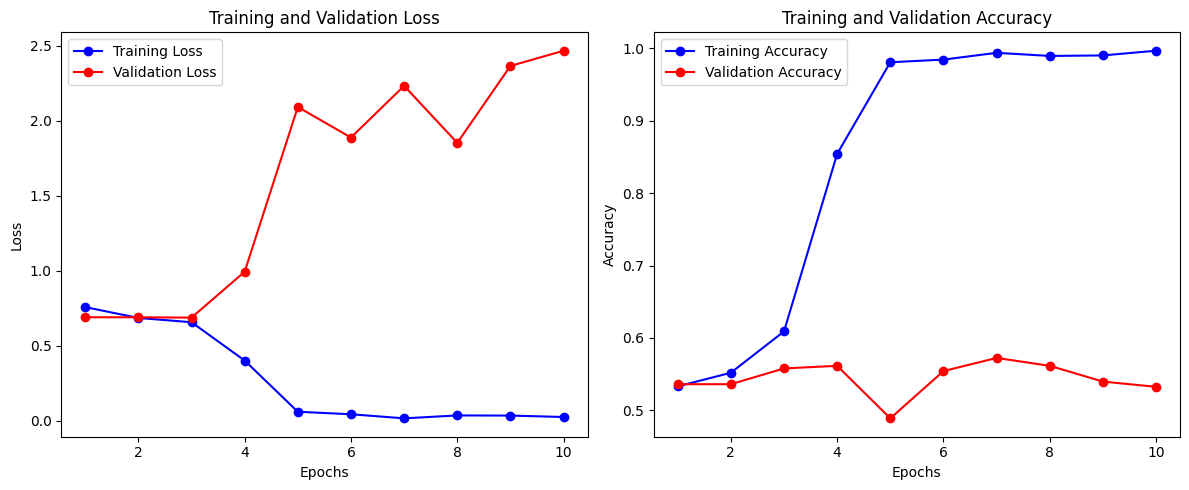

In [ ]:
import torch.optim as optim
import torch.nn.functional as F
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score

from sklearn.metrics import accuracy_score

# Training function
def train_model(model, train_loader, val_loader, num_epochs=10, learning_rate=0.0001):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)

    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_losses = []  # List to store training losses
    val_losses = []    # List to store validation losses
    val_accuracies = []  # List to store validation accuracies
    train_accuracies = []  # List to store training accuracies

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        all_train_labels = []
        all_train_preds = []

        for _ , labels, inputs in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()  # Zero the gradients
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss
            loss.backward()  # Backward pass
            optimizer.step()  # Update weights

            train_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            all_train_labels.extend(labels.cpu().numpy())
            all_train_preds.extend(preds.cpu().numpy())

        train_loss /= len(train_loader)
        train_losses.append(train_loss)  # Store training loss
        train_acc = accuracy_score(all_train_labels, all_train_preds)
        train_accuracies.append(train_acc)  # Store training accuracy

        # Validation step
        val_loss, val_acc = evaluate_model(model, val_loader, criterion, device)
        val_losses.append(val_loss)  # Store validation loss
        val_accuracies.append(val_acc)  # Store validation accuracy

        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}, '
              f'Accuracy: {train_acc:.4f}, Validation Loss: {val_loss:.4f}, '
              f'Validation Accuracy: {val_acc:.4f}')

    # Plotting the training process
    plot_training_process(train_losses, val_losses, train_accuracies, val_accuracies)

# Function to plot training process
def plot_training_process(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(12, 5))

    # Plot training and validation losses
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, 'bo-', label='Training Loss')
    plt.plot(epochs, val_losses, 'ro-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training and validation accuracies
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_accuracies, 'ro-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Example: Train the model
train_model(model, train_loader, test_loader, num_epochs=10)




In [ ]:
# Testing function
def test_model(model, test_loader):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    model.eval()

    all_labels = []
    all_preds = []

    with torch.no_grad():
        for _, labels, inputs in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())

    # Calculate accuracy
    test_acc = accuracy_score(all_labels, all_preds)
    print(f'Test Accuracy: {test_acc:.4f}')

# Example: Test the model
test_model(model, test_loader)


Test Accuracy: 0.5326


In [ ]:
import torch
import torch.nn as nn

class InceptionBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(InceptionBlock1D, self).__init__()
        # Different branches with different kernel sizes
        self.branch1 = nn.Conv1d(in_channels, out_channels, kernel_size=1, padding=0)  # 1x1 convolution
        self.branch2 = nn.Conv1d(in_channels, out_channels, kernel_size=3, padding=1)  # 3x3 convolution
        self.branch3 = nn.Conv1d(in_channels, out_channels, kernel_size=5, padding=2)  # 5x5 convolution
        self.branch_pool = nn.MaxPool1d(kernel_size=3, stride=1, padding=1)  # Max pooling branch
        self.branch_pool_conv = nn.Conv1d(in_channels, out_channels, kernel_size=1)  # 1x1 conv after pooling

    def forward(self, x):
        # Apply all branches
        branch1_out = self.branch1(x)
        branch2_out = self.branch2(x)
        branch3_out = self.branch3(x)
        branch_pool_out = self.branch_pool_conv(self.branch_pool(x))

        # Concatenate outputs along the channel dimension
        outputs = torch.cat([branch1_out, branch2_out, branch3_out, branch_pool_out], dim=1)
        return outputs

class InceptionModel1D(nn.Module):
    def __init__(self, input_channels, num_classes, seq_length):
        super(InceptionModel1D, self).__init__()

        # Inception blocks to extract multi-scale features
        self.inception1 = InceptionBlock1D(input_channels, 32)
        self.inception2 = InceptionBlock1D(128, 64)  # Concatenated output from 4 branches (32 * 4 = 128 channels)
        self.inception3 = InceptionBlock1D(256, 128)  # Concatenated output from 4 branches (64 * 4 = 256 channels)

        # Fully connected layer to project output to a smaller feature space for attention/transformer
        self.fc_projection = nn.Linear(512 * seq_length, 192)  # Output from Inception3 is (batch_size, 512, seq_length)

        # Transformer Encoder
        self.transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=192, nhead=8, batch_first=True),
            num_layers=2
        )

        # Classification layer
        self.classifier = nn.Linear(192, num_classes)

    def forward(self, x):
        # Apply Inception blocks
        x = self.inception1(x)  # Output shape: (batch_size, 128, seq_length)
        x = self.inception2(x)  # Output shape: (batch_size, 256, seq_length)
        x = self.inception3(x)  # Output shape: (batch_size, 512, seq_length)

        # Flatten the output to feed into fully connected layer
        x_flat = x.view(x.size(0), -1)  # (batch_size, 512 * seq_length)

        # Project to transformer input dimensions
        x_projected = self.fc_projection(x_flat)  # (batch_size, 192)
        x_projected = x_projected.unsqueeze(1).expand(-1, seq_length, -1)  # (batch_size, seq_length, 192)

        # Apply transformer encoder
        x_transformed = self.transformer(x_projected)  # (batch_size, seq_length, 192)

        # Use the first output of the transformer for classification
        out = self.classifier(x_transformed[:, 0, :])  # (batch_size, num_classes)

        return out




# section 2

In [ ]:
import torch
import torch.nn as nn

class InceptionBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(InceptionBlock1D, self).__init__()

        # Branches with different kernel sizes and one with dilated convolution
        self.branch1 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=1, padding=0),  # 1x1 convolution
            nn.BatchNorm1d(out_channels),
            nn.ReLU(),
            nn.Dropout(0.3)  # Dropout layer
        )
        self.branch2 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=3, padding=1, dilation=2),  # 3x3 dilated convolution
            nn.BatchNorm1d(out_channels),
            nn.ReLU(),
            nn.Dropout(0.3)
        )
        self.branch3 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=5, padding=2),  # 5x5 convolution
            nn.BatchNorm1d(out_channels),
            nn.ReLU(),
            nn.Dropout(0.3)
        )
        self.branch_pool = nn.MaxPool1d(kernel_size=3, stride=1, padding=1)  # Max pooling branch
        self.branch_pool_conv = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=1),  # 1x1 conv after pooling
            nn.BatchNorm1d(out_channels),
            nn.ReLU(),
            nn.Dropout(0.3)
        )

    def forward(self, x):
        # Apply all branches
        branch1_out = self.branch1(x)
        branch2_out = self.branch2(x)
        branch3_out = self.branch3(x)
        branch_pool_out = self.branch_pool_conv(self.branch_pool(x))

        # Concatenate outputs along the channel dimension
        outputs = torch.cat([branch1_out, branch2_out, branch3_out, branch_pool_out], dim=1)
        return outputs


class InceptionModel1D(nn.Module):
    def __init__(self, input_channels, num_classes, seq_length):
        super(InceptionModel1D, self).__init__()

        # Inception blocks to extract multi-scale features
        self.inception1 = InceptionBlock1D(input_channels, 32)
        self.inception2 = InceptionBlock1D(128, 64)  # 128 channels from the concatenation of 4 branches
        self.inception3 = InceptionBlock1D(256, 128)  # 256 channels from the concatenation of 4 branches

        # LSTM layer for temporal sequence processing
        self.lstm = nn.LSTM(512, 128, batch_first=True)  # Input size is 512 (from inception3), output size is 128

        # Fully connected layer before classification
        self.fc = nn.Linear(128, 64)  # New fully connected layer, output size 64

        # Classification layer
        self.classifier = nn.Linear(64, num_classes)  # Final output for classification

    def forward(self, x):
        # Apply Inception blocks
        x = self.inception1(x)  # Output shape: (batch_size, 128, seq_length)
        x = self.inception2(x)  # Output shape: (batch_size, 256, seq_length)
        x = self.inception3(x)  # Output shape: (batch_size, 512, seq_length)

        # Rearrange the tensor for LSTM: (batch_size, seq_length, num_features)
        x = x.permute(0, 2, 1)  # (batch_size, seq_length, 512)

        # Apply LSTM
        lstm_out, (hn, cn) = self.lstm(x)  # LSTM output shape: (batch_size, seq_length, 128)

        # Use the last output for fully connected layer
        x = lstm_out[:, -1, :]  # (batch_size, 128)

        # Apply fully connected layer before classification
        x = self.fc(x)  # (batch_size, 64)

        # Apply classifier for final output
        out = self.classifier(x)  # (batch_size, num_classes)

        return out


In [ ]:
import torch
import torch.nn as nn
# Model 1
class InceptionBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(InceptionBlock1D, self).__init__()
        # Branches with different kernel sizes
        self.branch1 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=1, padding=0),  # 1x1 convolution
            nn.BatchNorm1d(out_channels),
            nn.ReLU(),
            nn.Dropout(0.3)  # Dropout layer
        )
        self.branch2 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=3, padding=1),  # 3x3 convolution
            nn.BatchNorm1d(out_channels),
            nn.ReLU(),
            nn.Dropout(0.3)
        )
        self.branch3 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=5, padding=2),  # 5x5 convolution
            nn.BatchNorm1d(out_channels),
            nn.ReLU(),
            nn.Dropout(0.3)
        )
        self.branch_pool = nn.MaxPool1d(kernel_size=3, stride=1, padding=1)  # Max pooling branch
        self.branch_pool_conv = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=1),  # 1x1 conv after pooling
            nn.BatchNorm1d(out_channels),
            nn.ReLU(),
            nn.Dropout(0.3)
        )

    def forward(self, x):
        # Apply all branches
        branch1_out = self.branch1(x)
        branch2_out = self.branch2(x)
        branch3_out = self.branch3(x)
        branch_pool_out = self.branch_pool_conv(self.branch_pool(x))

        # Concatenate outputs along the channel dimension
        outputs = torch.cat([branch1_out, branch2_out, branch3_out, branch_pool_out], dim=1)
        return outputs

class InceptionModel1D(nn.Module):
    def __init__(self, input_channels, num_classes, seq_length):
        super(InceptionModel1D, self).__init__()

        # Inception blocks to extract multi-scale features
        self.inception1 = InceptionBlock1D(input_channels, 32)
        self.inception2 = InceptionBlock1D(128, 64)  # 128 channels from the concatenation of 4 branches
        self.inception3 = InceptionBlock1D(256, 128)  # 256 channels from the concatenation of 4 branches

        # LSTM layer for temporal sequence processing
        self.lstm = nn.LSTM(512, 128, batch_first=True)  # Input size is 512 (from inception3), output size is 128

        # Classification layer
        self.classifier = nn.Linear(128, num_classes)  # Output size from LSTM to number of classes

    def forward(self, x):
        # Apply Inception blocks
        x = self.inception1(x)  # Output shape: (batch_size, 128, seq_length)
        x = self.inception2(x)  # Output shape: (batch_size, 256, seq_length)
        x = self.inception3(x)  # Output shape: (batch_size, 512, seq_length)

        # Rearrange the tensor for LSTM: (batch_size, seq_length, num_features)
        x = x.permute(0, 2, 1)  # (batch_size, seq_length, 512)

        # Apply LSTM
        lstm_out, (hn, cn) = self.lstm(x)  # LSTM output shape: (batch_size, seq_length, 128)

        # Use the last output for classification
        out = self.classifier(lstm_out[:, -1, :])  # (batch_size, num_classes)

        return out


In [ ]:
import torch
import torch.nn as nn

class InceptionBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(InceptionBlock1D, self).__init__()
        # Branches with different kernel sizes
        self.branch1 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=1, padding=0),  # 1x1 convolution
            nn.BatchNorm1d(out_channels),
            nn.ReLU(),
            nn.Dropout(0.3)  # Dropout layer
        )
        self.branch2 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=3, padding=1),  # 3x3 convolution
            nn.BatchNorm1d(out_channels),
            nn.ReLU(),
            nn.Dropout(0.3)
        )
        self.branch3 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=5, padding=2),  # 5x5 convolution
            nn.BatchNorm1d(out_channels),
            nn.ReLU(),
            nn.Dropout(0.3)
        )
        self.branch_pool = nn.MaxPool1d(kernel_size=3, stride=1, padding=1)  # Max pooling branch
        self.branch_pool_conv = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=1),  # 1x1 conv after pooling
            nn.BatchNorm1d(out_channels),
            nn.ReLU(),
            nn.Dropout(0.3)
        )

    def forward(self, x):
        # Apply all branches
        branch1_out = self.branch1(x)
        branch2_out = self.branch2(x)
        branch3_out = self.branch3(x)
        branch_pool_out = self.branch_pool_conv(self.branch_pool(x))

        # Concatenate outputs along the channel dimension
        outputs = torch.cat([branch1_out, branch2_out, branch3_out, branch_pool_out], dim=1)
        return outputs

class InceptionModel1D(nn.Module):
    def __init__(self, input_channels, num_classes, seq_length):
        super(InceptionModel1D, self).__init__()

        # Inception blocks to extract multi-scale features
        self.inception1 = InceptionBlock1D(input_channels, 32)
        self.inception2 = InceptionBlock1D(128, 64)  # 128 channels from the concatenation of 4 branches
        self.inception3 = InceptionBlock1D(256, 128)  # 256 channels from the concatenation of 4 branches

        # Fully connected layers for classification
        # Fully connected layers for classification
        self.fc1 = nn.Linear(512 * seq_length, 256)  # Input size is 512 * seq_length
        self.fc2 = nn.Linear(256, 128)  # New fully connected layer
        self.fc3 = nn.Linear(128, num_classes)  # Output size to number of classes


    def forward(self, x):
        # Apply Inception blocks
        x = self.inception1(x)  # Output shape: (batch_size, 128, seq_length)
        x = self.inception2(x)  # Output shape: (batch_size, 256, seq_length)
        x = self.inception3(x)  # Output shape: (batch_size, 512, seq_length)

        # Flatten the output for the fully connected layers
        x_flat = x.view(x.size(0), -1)  # (batch_size, 512 * seq_length)

        # Apply fully connected layers
        x = self.fc1(x_flat)  # First fully connected layer
        x = nn.ReLU()(x)  # Activation
        x = nn.Dropout(0.3)(x)  # Dropout layer
        x = self.fc2(x)  # Second fully connected layer
        x = nn.ReLU()(x)  # Activation
        x = nn.Dropout(0.3)(x)  # Dropout layer
        out = self.fc3(x)  # Th
        return out


In [ ]:
# Nov. 08. dilation CNN
class InceptionBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(InceptionBlock1D, self).__init__()

        # Branches with different kernel sizes and dilations
        # Branch 1: 1x1 convolution (no change needed)
        self.branch1 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=1, padding=0),  # 1x1 convolution
            nn.BatchNorm1d(out_channels),
            nn.ReLU(),
            nn.Dropout(0.3)  # Dropout layer
        )

        # Branch 2: 3x3 convolution with dilation=1 (adjust padding to match output size)
        self.branch2 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=3, padding=1, dilation=1),  # 3x3 convolution
            nn.BatchNorm1d(out_channels),
            nn.ReLU(),
            nn.Dropout(0.3)
        )

        # Branch 3: 5x5 convolution (adjust padding to maintain output size)
        self.branch3 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=5, padding=2, dilation=1),  # 5x5 convolution
            nn.BatchNorm1d(out_channels),
            nn.ReLU(),
            nn.Dropout(0.3)
        )

        # Branch 4: Max pooling followed by 1x1 convolution (output size is maintained)
        self.branch_pool = nn.MaxPool1d(kernel_size=3, stride=1, padding=1)  # Max pooling branch
        self.branch_pool_conv = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=1),  # 1x1 conv after pooling
            nn.BatchNorm1d(out_channels),
            nn.ReLU(),
            nn.Dropout(0.3)
        )

    def forward(self, x):
        # Apply all branches
        branch1_out = self.branch1(x)  # No change in sequence length
        branch2_out = self.branch2(x)  # Padding = 1, dilation = 1 to maintain size
        branch3_out = self.branch3(x)  # Padding = 2, dilation = 1 to maintain size
        branch_pool_out = self.branch_pool_conv(self.branch_pool(x))  # MaxPool + 1x1 conv (same size)

        # Concatenate outputs along the channel dimension
        outputs = torch.cat([branch1_out, branch2_out, branch3_out, branch_pool_out], dim=1)
        return outputs


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class InceptionBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(InceptionBlock1D, self).__init__()

        # Branches with different kernel sizes and dilations
        self.branch1 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=1, padding=0),  # 1x1 convolution
            nn.BatchNorm1d(out_channels),
            nn.ReLU(),
            nn.Dropout(0.3)  # Dropout layer
        )

        self.branch2 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=3, padding=1, dilation=1),  # 3x3 convolution
            nn.BatchNorm1d(out_channels),
            nn.ReLU(),
            nn.Dropout(0.3)
        )

        self.branch3 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=5, padding=2, dilation=1),  # 5x5 convolution
            nn.BatchNorm1d(out_channels),
            nn.ReLU(),
            nn.Dropout(0.3)
        )

        self.branch_pool = nn.MaxPool1d(kernel_size=3, stride=1, padding=1)  # Max pooling branch
        self.branch_pool_conv = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=1),  # 1x1 conv after pooling
            nn.BatchNorm1d(out_channels),
            nn.ReLU(),
            nn.Dropout(0.3)
        )

    def forward(self, x):
        # Apply all branches
        branch1_out = self.branch1(x)  # Output shape: (batch_size, out_channels, seq_length)
        branch2_out = self.branch2(x)
        branch3_out = self.branch3(x)
        branch_pool_out = self.branch_pool_conv(self.branch_pool(x))

        # Concatenate outputs along the channel dimension
        outputs = torch.cat([branch1_out, branch2_out, branch3_out, branch_pool_out], dim=1)
        return outputs

class InceptionModel1D(nn.Module):
    def __init__(self, input_channels, num_classes, seq_length):
        super(InceptionModel1D, self).__init__()

        # Inception blocks to extract multi-scale features
        self.inception1 = InceptionBlock1D(input_channels, 32)
        self.inception2 = InceptionBlock1D(128, 64)  # 128 channels from the concatenation of 4 branches
        self.inception3 = InceptionBlock1D(256, 128)  # 256 channels from the concatenation of 4 branches

        # Fully connected layers for classification
        self.fc1 = nn.Linear(512 * seq_length, 256)
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        # Apply Inception blocks
        x = self.inception1(x)  # Output shape: (batch_size, 128, seq_length)
        x = self.inception2(x)  # Output shape: (batch_size, 256, seq_length)
        x = self.inception3(x)  # Output shape: (batch_size, 512, seq_length)

        # Flatten the output before the fully connected layers
        x_flat = x.view(x.size(0), -1)  # (batch_size, 512 * seq_length)

        # Fully connected layers
        x_fc = self.fc1(x_flat)  # (batch_size, 256)
        out = self.fc2(x_fc)     # (batch_size, num_classes)

        return out

# Example training function
def train_model(model, train_loader, val_loader, num_epochs=10):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Validation
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(train_loader):.4f}, '
              f'Val Loss: {val_loss / len(val_loader):.4f}, '
              f'Val Accuracy: {100 * correct / total:.2f}%')

# You can now train your model using train_model(model, train_loader, val_loader, num_epochs=20)


In [ ]:
import torch
import torch.nn as nn

class BottleneckLayer(nn.Module):
    def __init__(self, in_channels, bottleneck_channels):
        super(BottleneckLayer, self).__init__()
        self.bottleneck = nn.Sequential(
            nn.Conv1d(in_channels, bottleneck_channels, kernel_size=1),  # 1x1 convolution for bottleneck
            nn.BatchNorm1d(bottleneck_channels),
            nn.ReLU()
        )

    def forward(self, x):
        return self.bottleneck(x)

class InceptionBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(InceptionBlock1D, self).__init__()

        # Branches with different kernel sizes
        self.branch1 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=1, padding=0),  # 1x1 convolution
            nn.BatchNorm1d(out_channels),
            nn.ReLU(),
            nn.Dropout(0.3)  # Dropout layer
        )

        self.branch2 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=5, padding=2),  # 5x5 convolution
            nn.BatchNorm1d(out_channels),
            nn.ReLU(),
            nn.Dropout(0.3)
        )

        self.branch3 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=15, padding=7),  # 15x15 convolution with adjusted padding
            nn.BatchNorm1d(out_channels),
            nn.ReLU(),
            nn.Dropout(0.3)
        )

        self.branch_pool = nn.MaxPool1d(kernel_size=3, stride=1, padding=1)  # Max pooling branch
        self.branch_pool_conv = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=1),  # 1x1 conv after pooling
            nn.BatchNorm1d(out_channels),
            nn.ReLU(),
            nn.Dropout(0.3)
        )

    def forward(self, x):
        # Apply all branches
        branch1_out = self.branch1(x)  # Output shape: (batch_size, out_channels, seq_length)
        branch2_out = self.branch2(x)  # Output shape: (batch_size, out_channels, seq_length)
        branch3_out = self.branch3(x)  # Output shape: (batch_size, out_channels, seq_length)
        branch_pool_out = self.branch_pool_conv(self.branch_pool(x))  # Output shape should match

        # Check output sizes for debugging
        print(f'Branch 1 output shape: {branch1_out.shape}')
        print(f'Branch 2 output shape: {branch2_out.shape}')
        print(f'Branch 3 output shape: {branch3_out.shape}')
        print(f'Branch Pool output shape: {branch_pool_out.shape}')

        # Concatenate outputs along the channel dimension
        outputs = torch.cat([branch1_out, branch2_out, branch3_out, branch_pool_out], dim=1)
        return outputs

class InceptionModel1D(nn.Module):
    def __init__(self, input_channels, num_classes, seq_length):
        super(InceptionModel1D, self).__init__()

        # Bottleneck layer
        self.bottleneck = BottleneckLayer(input_channels, 128)  # Bottleneck reduces to 128 channels

        # Two Inception blocks to extract multi-scale features
        self.inception1 = InceptionBlock1D(128, 64)  # 64 output channels for inception
        self.inception2 = InceptionBlock1D(64 * 4, 32)  # 32 output channels after concatenation

        # Calculate the output size after Inception blocks
        self.fc_layer = nn.Linear(32 * seq_length, num_classes)  # Adjusted output size based on inception2's output

    def forward(self, x):
        # Apply bottleneck layer
        x = self.bottleneck(x)  # Output shape: (batch_size, 128, seq_length)
        print(f'After bottleneck: {x.shape}')

        # Apply Inception blocks
        x = self.inception1(x)  # Output shape: (batch_size, 256, seq_length)
        print(f'After inception1: {x.shape}')

        x = self.inception2(x)  # Output shape: (batch_size, 128, seq_length)
        print(f'After inception2: {x.shape}')

        # Flatten the output before the fully connected layer
        x_flat = x.view(x.size(0), -1)  # (batch_size, 128 * seq_length)

        # Fully connected layer
        out = self.fc_layer(x_flat)  # (batch_size, num_classes)

        return out


input_channels = 16  # Number of input channels (e.g., features)
num_classes = 2     # Number of classes for classification
seq_length = 60      # Length of the input sequence




In [ ]:
import torch
import torch.nn as nn

class BottleneckLayer(nn.Module):
    def __init__(self, in_channels, bottleneck_channels):
        super(BottleneckLayer, self).__init__()
        self.bottleneck = nn.Sequential(
            nn.Conv1d(in_channels, bottleneck_channels, kernel_size=1),  # 1x1 convolution for bottleneck
            nn.BatchNorm1d(bottleneck_channels),
            nn.ReLU()
        )

    def forward(self, x):
        return self.bottleneck(x)

class InceptionBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(InceptionBlock1D, self).__init__()

        # Branches with different kernel sizes
        self.branch1 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=1, padding=0),  # 1x1 convolution
            nn.BatchNorm1d(out_channels),
            nn.ReLU(),
            nn.Dropout(0.3)  # Dropout layer
        )

        self.branch2 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=5, padding=2),  # 5x5 convolution
            nn.BatchNorm1d(out_channels),
            nn.ReLU(),
            nn.Dropout(0.3)
        )

        self.branch3 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=15, padding=7),  # 15x15 convolution with adjusted padding
            nn.BatchNorm1d(out_channels),
            nn.ReLU(),
            nn.Dropout(0.3)
        )

        self.branch_pool = nn.MaxPool1d(kernel_size=3, stride=1, padding=1)  # Max pooling branch
        self.branch_pool_conv = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=1),  # 1x1 conv after pooling
            nn.BatchNorm1d(out_channels),
            nn.ReLU(),
            nn.Dropout(0.3)
        )

    def forward(self, x):
        # Apply all branches
        branch1_out = self.branch1(x)  # Output shape: (batch_size, out_channels, seq_length)
        branch2_out = self.branch2(x)  # Output shape: (batch_size, out_channels, seq_length)
        branch3_out = self.branch3(x)  # Output shape: (batch_size, out_channels, seq_length)
        branch_pool_out = self.branch_pool_conv(self.branch_pool(x))  # Output shape should match

        # Concatenate outputs along the channel dimension
        outputs = torch.cat([branch1_out, branch2_out, branch3_out, branch_pool_out], dim=1)
        return outputs

class InceptionModel1D(nn.Module):
    def __init__(self, input_channels, num_classes, seq_length):
        super(InceptionModel1D, self).__init__()

        # Bottleneck layer
        self.bottleneck = BottleneckLayer(input_channels, 64)  # Bottleneck reduces to 128 channels

        # Two Inception blocks to extract multi-scale features
        self.inception1 = InceptionBlock1D(64, 64)  # 64 output channels for inception
        self.inception2 = InceptionBlock1D(64 * 4, 32)  # 32 output channels after concatenation

        # Update the output size for the fully connected layer
        self.fc_layer = nn.Linear(128 * 60, num_classes)  # Adjusted output size

    def forward(self, x):
        # Apply bottleneck layer
        x = self.bottleneck(x)  # Output shape: (batch_size, 128, seq_length)

        # Apply Inception blocks
        x = self.inception1(x)  # Output shape: (batch_size, 256, seq_length)


        x = self.inception2(x)  # Output shape: (batch_size, 128, seq_length)

        # Flatten the output before the fully connected layer
        x_flat = x.view(x.size(0), -1)  # (batch_size, 128 * seq_length)

        # Fully connected layer
        out = self.fc_layer(x_flat)  # (batch_size, num_classes)

        return out



In [ ]:
import torch
import torch.nn as nn
# good one
class BottleneckLayer(nn.Module):
    def __init__(self, in_channels, bottleneck_channels):
        super(BottleneckLayer, self).__init__()
        self.bottleneck = nn.Sequential(
            nn.Conv1d(in_channels, bottleneck_channels, kernel_size=1),  # 1x1 convolution for bottleneck
            nn.BatchNorm1d(bottleneck_channels),
            nn.ReLU()
        )

    def forward(self, x):
        return self.bottleneck(x)

class InceptionBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(InceptionBlock1D, self).__init__()

        # Branches with different kernel sizes
        self.branch1 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=1),  # 1x1 convolution
            nn.BatchNorm1d(out_channels),
            nn.ReLU(),
            nn.Dropout(0.3)
        )

        self.branch2 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=3, padding=1),  # 3x3 convolution
            nn.BatchNorm1d(out_channels),
            nn.ReLU(),
            nn.Dropout(0.3)
        )

        self.branch3 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=5, padding=2),  # 5x5 convolution
            nn.BatchNorm1d(out_channels),
            nn.ReLU(),
            nn.Dropout(0.3)
        )

        self.branch_pool = nn.MaxPool1d(kernel_size=3, stride=1, padding=1)  # Max pooling branch
        self.branch_pool_conv = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=1),  # 1x1 conv after pooling
            nn.BatchNorm1d(out_channels),
            nn.ReLU(),
            nn.Dropout(0.3)
        )

    def forward(self, x):
        # Apply all branches
        branch1_out = self.branch1(x)
        branch2_out = self.branch2(x)
        branch3_out = self.branch3(x)
        branch_pool_out = self.branch_pool_conv(self.branch_pool(x))

        # Concatenate outputs along the channel dimension
        outputs = torch.cat([branch1_out, branch2_out, branch3_out, branch_pool_out], dim=1)
        return outputs

class InceptionModel1D(nn.Module):
    def __init__(self, input_channels, num_classes, seq_length):
        super(InceptionModel1D, self).__init__()

        # Bottleneck layer
        self.bottleneck = BottleneckLayer(input_channels, 32)  # Reduced bottleneck channels

        # Single Inception block to extract multi-scale features
        self.inception = InceptionBlock1D(32, 32)  # Reduced output channels

        # Fully connected layer
        self.fc_layer = nn.Linear(32 * 4 * seq_length, num_classes)  # Adjusted output size

    def forward(self, x):
        # Apply bottleneck layer
        x = self.bottleneck(x)  # Output shape: (batch_size, 32, seq_length)

        # Apply Inception block
        x = self.inception(x)  # Output shape: (batch_size, 128, seq_length) after concatenation

        # Flatten the output before the fully connected layer
        x_flat = x.view(x.size(0), -1)  # (batch_size, 128 * seq_length)

        # Fully connected layer
        out = self.fc_layer(x_flat)  # (batch_size, num_classes)

        return out



# Bottle Neck + Inception + Transformer Encoder
# Nov. 08 good

In [ ]:
import torch
import torch.nn as nn

# Bottleneck Layer
class BottleneckLayer(nn.Module):
    def __init__(self, in_channels, bottleneck_channels):
        super(BottleneckLayer, self).__init__()
        self.bottleneck = nn.Sequential(
            nn.Conv1d(in_channels, bottleneck_channels, kernel_size=1),  # 1x1 convolution for bottleneck
            nn.BatchNorm1d(bottleneck_channels),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Dropout(0.4)
        )

    def forward(self, x):
        return self.bottleneck(x)

# Inception Block
class InceptionBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(InceptionBlock1D, self).__init__()
        self.branch1 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm1d(out_channels),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Dropout(0.4)
        )
        self.branch2 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=7, padding=3),
            nn.BatchNorm1d(out_channels),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Dropout(0.4)
        )
        self.branch3 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=11, padding=5),
            nn.BatchNorm1d(out_channels),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Dropout(0.4)
        )
        self.branch_pool = nn.MaxPool1d(kernel_size=3, stride=1, padding=1)
        self.branch_pool_conv = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=1),
            nn.BatchNorm1d(out_channels),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Dropout(0.4)
        )

    def forward(self, x):
        branch1_out = self.branch1(x)
        branch2_out = self.branch2(x)
        branch3_out = self.branch3(x)
        branch_pool_out = self.branch_pool_conv(self.branch_pool(x))
        outputs = torch.cat([branch1_out, branch2_out, branch3_out, branch_pool_out], dim=1)
        return outputs

# Attention Layer
class AttentionLayer(nn.Module):
    def __init__(self, embed_dim, num_heads):
        super(AttentionLayer, self).__init__()
        self.multihead_attn = nn.MultiheadAttention(embed_dim=embed_dim, num_heads=num_heads)

    def forward(self, x):
        # MultiheadAttention expects input (seq_len, batch_size, embed_dim)
        x = x.permute(2, 0, 1)  # Permute to (seq_len, batch_size, embed_dim)
        attn_output, attn_weights = self.multihead_attn(x, x, x)
        return attn_output.permute(1, 2, 0)  # Return to original shape (batch_size, embed_dim, seq_len)

# Inception Model with Bottleneck and Attention
class InceptionModel1D(nn.Module):
    def __init__(self, input_channels, seq_length, num_classes=1):
        super(InceptionModel1D, self).__init__()
        self.bottleneck = BottleneckLayer(input_channels, 128)
        self.inception1 = InceptionBlock1D(128, 32)  # Output: 128 channels after concatenation
        self.attention = AttentionLayer(128, num_heads=4)  # Embedding dimension is 128 to match Inception output

        self.fc_layer = nn.Sequential(
            nn.Linear(128 * seq_length, 128),  # Increased hidden units for complexity
            nn.LeakyReLU(negative_slope=0.1),
            nn.Dropout(0.4),
            nn.Linear(128, 64),  # Added another layer to increase complexity
            nn.LeakyReLU(negative_slope=0.1),
            nn.Dropout(0.4),
            nn.Linear(64, num_classes),  # Single output for binary classification
            nn.Sigmoid()  # Binary classification
        )

    def forward(self, x):
        x = self.bottleneck(x)
        x = self.inception1(x)  # Output shape: (batch_size, 128, seq_length)
        x = self.attention(x)    # Input to attention layer: (batch_size, 128, seq_length)
        x = x.reshape(x.size(0), -1)  # Flatten for the fully connected layer
        out = self.fc_layer(x)
        return out


In [ ]:
# new version.

import torch
import torch.nn as nn

# Bottleneck Layer
class BottleneckLayer(nn.Module):
    def __init__(self, in_channels, bottleneck_channels):
        super(BottleneckLayer, self).__init__()
        self.bottleneck = nn.Sequential(
            nn.Conv1d(in_channels, bottleneck_channels, kernel_size=1),  # 1x1 convolution for bottleneck
            nn.BatchNorm1d(bottleneck_channels),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Dropout(0.4)
        )

    def forward(self, x):
        return self.bottleneck(x)

# Inception Block with Dilated CNN
class InceptionBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(InceptionBlock1D, self).__init__()

        # Branch 1: Dilated 1D convolution with kernel size 3
        self.branch1 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=3, padding=2, dilation=2),  # Dilated conv
            nn.BatchNorm1d(out_channels),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Dropout(0.4)
        )

        # Branch 2: Dilated 1D convolution with kernel size 5
        self.branch2 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=5, padding=4, dilation=2),  # Dilated conv
            nn.BatchNorm1d(out_channels),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Dropout(0.4)
        )

        # Branch 3: Dilated 1D convolution with kernel size 7
        self.branch3 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=7, padding=6, dilation=2),  # Dilated conv
            nn.BatchNorm1d(out_channels),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Dropout(0.4)
        )

        # Branch Pool: Max pooling and 1x1 convolution
        self.branch_pool = nn.MaxPool1d(kernel_size=3, stride=1, padding=1)
        self.branch_pool_conv = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=1),
            nn.BatchNorm1d(out_channels),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Dropout(0.4)
        )

    def forward(self, x):
        branch1_out = self.branch1(x)
        branch2_out = self.branch2(x)
        branch3_out = self.branch3(x)
        branch_pool_out = self.branch_pool_conv(self.branch_pool(x))
        outputs = torch.cat([branch1_out, branch2_out, branch3_out, branch_pool_out], dim=1)
        return outputs

# Attention Layer
class AttentionLayer(nn.Module):
    def __init__(self, embed_dim, num_heads):
        super(AttentionLayer, self).__init__()
        self.multihead_attn = nn.MultiheadAttention(embed_dim=embed_dim, num_heads=num_heads)

    def forward(self, x):
        # MultiheadAttention expects input (seq_len, batch_size, embed_dim)
        x = x.permute(2, 0, 1)  # Permute to (seq_len, batch_size, embed_dim)
        attn_output, attn_weights = self.multihead_attn(x, x, x)
        return attn_output.permute(1, 2, 0)  # Return to original shape (batch_size, embed_dim, seq_len)

# Inception Model with Dilated CNN, Bottleneck, Attention and Classification Layer
class InceptionModel1D(nn.Module):
    def __init__(self, input_channels, seq_length, num_classes=1):
        super(InceptionModel1D, self).__init__()

        # Bottleneck layer with 64 channels
        self.bottleneck = BottleneckLayer(input_channels, 64)

        # Two Inception blocks with output of 128 channels
        self.inception1 = InceptionBlock1D(64, 32)  # Output: 128 channels after concatenation
        self.inception2 = InceptionBlock1D(128, 32)  # Output: 128 channels after concatenation

        # Attention Layer after Inception Blocks
        self.attention = AttentionLayer(128, num_heads=4)  # Embedding dimension is 128 to match Inception output

        # Fully Connected (FC) Classification Layer
        self.fc_layer = nn.Sequential(
            nn.Linear(128 * seq_length, 128),  # Input is (batch_size, 128 * seq_length)
            nn.LeakyReLU(negative_slope=0.1),
            nn.Dropout(0.4),
            nn.Linear(128, 64),  # Added another layer with 64 neurons
            nn.LeakyReLU(negative_slope=0.1),
            nn.Dropout(0.4),
            nn.Linear(64, num_classes),  # Single output for binary classification
            nn.Sigmoid()  # Binary classification
        )

    def forward(self, x):
        x = self.bottleneck(x)  # Apply bottleneck layer (reduce channels)
        x = self.inception1(x)   # Apply first Inception Block
        x = self.inception2(x)   # Apply second Inception Block
        x = self.attention(x)    # Apply Attention Layer
        x = x.reshape(x.size(0), -1)  # Flatten for the fully connected layer
        out = self.fc_layer(x)  # Classification output
        return out


In [ ]:
import torch
import torch.nn as nn
# good version
# Inception Block with Dilated CNN
class InceptionBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(InceptionBlock1D, self).__init__()

        # Branch 1: Dilated 1D convolution with kernel size 3
        self.branch1 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=3, padding=2, dilation=2),  # Dilated conv
            nn.BatchNorm1d(out_channels),
            nn.LeakyReLU(negative_slope=0.01),
            nn.Dropout(0.4)
        )

        # Branch 2: Dilated 1D convolution with kernel size 5
        self.branch2 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=5, padding=4, dilation=2),  # Dilated conv
            nn.BatchNorm1d(out_channels),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Dropout(0.4)
        )

        # Branch 3: Dilated 1D convolution with kernel size 7
        self.branch3 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=7, padding=6, dilation=2),  # Dilated conv
            nn.BatchNorm1d(out_channels),
            nn.LeakyReLU(negative_slope=0.01),
            nn.Dropout(0.4)
        )

        # Branch Pool: Max pooling and 1x1 convolution
        self.branch_pool = nn.MaxPool1d(kernel_size=3, stride=1, padding=1)
        self.branch_pool_conv = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=1),
            nn.BatchNorm1d(out_channels),
            nn.LeakyReLU(negative_slope=0.01),
            nn.Dropout(0.4)
        )

    def forward(self, x):
        branch1_out = self.branch1(x)
        branch2_out = self.branch2(x)
        branch3_out = self.branch3(x)
        branch_pool_out = self.branch_pool_conv(self.branch_pool(x))
        outputs = torch.cat([branch1_out, branch2_out, branch3_out, branch_pool_out], dim=1)
        return outputs

# Attention Layer
class AttentionLayer(nn.Module):
    def __init__(self, embed_dim, num_heads):
        super(AttentionLayer, self).__init__()
        self.multihead_attn = nn.MultiheadAttention(embed_dim=embed_dim, num_heads=num_heads)

    def forward(self, x):
        # MultiheadAttention expects input (seq_len, batch_size, embed_dim)
        x = x.permute(2, 0, 1)  # Permute to (seq_len, batch_size, embed_dim)
        attn_output, attn_weights = self.multihead_attn(x, x, x)
        return attn_output.permute(1, 2, 0)  # Return to original shape (batch_size, embed_dim, seq_len)

# Inception Model with Dilated CNN, Attention, and Classification Layer
class InceptionModel1D(nn.Module):
    def __init__(self, input_channels, seq_length, num_classes=1):
        super(InceptionModel1D, self).__init__()

        # Two Inception blocks with output of 128 channels
        self.inception1 = InceptionBlock1D(input_channels, 32)  # Output: 128 channels after concatenation
        self.inception2 = InceptionBlock1D(128, 32)  # Output: 128 channels after concatenation

        # Attention Layer after Inception Blocks
        self.attention = AttentionLayer(128, num_heads=4)  # Embedding dimension is 128 to match Inception output

        # Fully Connected (FC) Classification Layer
        self.fc_layer = nn.Sequential(
            nn.Linear(128 * seq_length, 128),  # Input is (batch_size, 128 * seq_length)
            nn.LeakyReLU(negative_slope=0.1),
            nn.Dropout(0.4),
            nn.Linear(128, 64),  # Added another layer with 64 neurons
            nn.LeakyReLU(negative_slope=0.1),
            nn.Dropout(0.4),
            nn.Linear(64, num_classes),  # Single output for binary classification
            nn.Sigmoid()  # Binary classification
        )

    def forward(self, x):
        x = self.inception1(x)   # Apply first Inception Block
        x = self.inception2(x)   # Apply second Inception Block
        x = self.attention(x)    # Apply Attention Layer
        x = x.reshape(x.size(0), -1)  # Flatten for the fully connected layer
        out = self.fc_layer(x)  # Classification output
        return out


In [ ]:
# model 2. good
class InceptionBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(InceptionBlock1D, self).__init__()

        # Branch 1: Regular 1D convolution with kernel size 3 (no dilation)
        self.branch1 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=3, padding=1),  # Standard conv with kernel=3
            nn.BatchNorm1d(out_channels),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Dropout(0.5)
        )

        # Branch 2: Dilated 1D convolution with kernel size 5
        self.branch2 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=5, padding=4, dilation=2),  # Dilated conv
            nn.BatchNorm1d(out_channels),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Dropout(0.5)
        )

        # Branch 3: Dilated 1D convolution with kernel size 11
        self.branch3 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=11, padding=10, dilation=2),  # Dilated conv with kernel=11
            nn.BatchNorm1d(out_channels),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Dropout(0.5)
        )

        # Branch Pool: Max pooling and 1x1 convolution
        self.branch_pool = nn.MaxPool1d(kernel_size=3, stride=1, padding=1)
        self.branch_pool_conv = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=1),
            nn.BatchNorm1d(out_channels),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Dropout(0.5)
        )

    def forward(self, x):
        branch1_out = self.branch1(x)
        branch2_out = self.branch2(x)
        branch3_out = self.branch3(x)
        branch_pool_out = self.branch_pool_conv(self.branch_pool(x))
        outputs = torch.cat([branch1_out, branch2_out, branch3_out, branch_pool_out], dim=1)
        return outputs

# Attention Layer
class AttentionLayer(nn.Module):
    def __init__(self, embed_dim, num_heads):
        super(AttentionLayer, self).__init__()
        self.multihead_attn = nn.MultiheadAttention(embed_dim=embed_dim, num_heads=num_heads)

    def forward(self, x):
        # MultiheadAttention expects input (seq_len, batch_size, embed_dim)
        x = x.permute(2, 0, 1)  # Permute to (seq_len, batch_size, embed_dim)
        attn_output, attn_weights = self.multihead_attn(x, x, x)
        return attn_output.permute(1, 2, 0)  # Return to original shape (batch_size, embed_dim, seq_len)

# Inception Model with Single Inception Block, Dilated CNN, Attention, and Classification Layer
class InceptionModel1D(nn.Module):
    def __init__(self, input_channels, seq_length, num_classes=1):
        super(InceptionModel1D, self).__init__()

        # Single Inception block with output of 128 channels
        self.inception = InceptionBlock1D(input_channels, 32)  # Output: 128 channels after concatenation

        # Attention Layer after Inception Block
        self.attention = AttentionLayer(128, num_heads=4)  # Embedding dimension is 128 to match Inception output

        # Fully Connected (FC) Classification Layer
        self.fc_layer = nn.Sequential(
            nn.Linear(128 * seq_length, 64),  # Input is (batch_size, 128 * seq_length)
            nn.LeakyReLU(negative_slope=0.1),
            nn.Linear(64, num_classes),  # Single output for binary classification
            nn.Sigmoid()  # Binary classification
        )

    def forward(self, x):
        x = self.inception(x)   # Apply the Inception Block
        x = self.attention(x)    # Apply Attention Layer
        x = x.reshape(x.size(0), -1)  # Flatten for the fully connected layer
        out = self.fc_layer(x)  # Classification output
        return out


In [ ]:
import torch
import torch.nn as nn
# Good 72.5
# Inception Block with Dilated 1D Convolutions
class InceptionBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(InceptionBlock1D, self).__init__()

        # Branch 1: Dilated 1D convolution with kernel size 3
        self.branch1 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=3, padding=2, dilation=2),  # Dilated conv
            nn.BatchNorm1d(out_channels),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Dropout(0.5)
        )

        # Branch 2: Dilated 1D convolution with kernel size 5
        self.branch2 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=5, padding=4, dilation=2),  # Dilated conv
            nn.BatchNorm1d(out_channels),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Dropout(0.5)
        )

        # Branch 3: Dilated 1D convolution with kernel size 7
        self.branch3 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=7, padding=6, dilation=2),  # Dilated conv
            nn.BatchNorm1d(out_channels),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Dropout(0.5)
        )

        # Branch Pool: Max pooling and 1x1 convolution
        self.branch_pool = nn.MaxPool1d(kernel_size=3, stride=1, padding=1)
        self.branch_pool_conv = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=1),
            nn.BatchNorm1d(out_channels),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Dropout(0.5)
        )

    def forward(self, x):
        branch1_out = self.branch1(x)
        branch2_out = self.branch2(x)
        branch3_out = self.branch3(x)
        branch_pool_out = self.branch_pool_conv(self.branch_pool(x))
        outputs = torch.cat([branch1_out, branch2_out, branch3_out, branch_pool_out], dim=1)
        return outputs

# Attention Layer
class AttentionLayer(nn.Module):
    def __init__(self, embed_dim, num_heads):
        super(AttentionLayer, self).__init__()
        self.multihead_attn = nn.MultiheadAttention(embed_dim=embed_dim, num_heads=num_heads)

    def forward(self, x):
        # MultiheadAttention expects input (seq_len, batch_size, embed_dim)
        x = x.permute(2, 0, 1)  # Permute to (seq_len, batch_size, embed_dim)
        attn_output, attn_weights = self.multihead_attn(x, x, x)
        return attn_output.permute(1, 2, 0)  # Return to original shape (batch_size, embed_dim, seq_len)

# Inception Model with Single Inception Block, Dilated CNN, Attention, and Classification Layer
class InceptionModel1D(nn.Module):
    def __init__(self, input_channels, seq_length, num_classes=1):
        super(InceptionModel1D, self).__init__()

        # Single Inception block with output of 128 channels
        self.inception = InceptionBlock1D(input_channels, 32)  # Output: 128 channels after concatenation

        # Attention Layer after Inception Block
        self.attention = AttentionLayer(128, num_heads=4)  # Embedding dimension is 128 to match Inception output

        # Fully Connected (FC) Classification Layer
        self.fc_layer = nn.Sequential(
            nn.Linear(128 * seq_length, 64),  # Input is (batch_size, 128 * seq_length)
            nn.LeakyReLU(negative_slope=0.1),
            #nn.Dropout(0.5),
            nn.Linear(64, num_classes),  # Single output for binary classification
            nn.Sigmoid()  # Binary classification
        )

    def forward(self, x):
        x = self.inception(x)   # Apply the Inception Block
        x = self.attention(x)    # Apply Attention Layer
        x = x.reshape(x.size(0), -1)  # Flatten for the fully connected layer
        out = self.fc_layer(x)  # Classification output
        return out


In [ ]:
class InceptionBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(InceptionBlock1D, self).__init__()

        # Branch 1: Regular 1D convolution with kernel size 3 (no dilation)
        self.branch1 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=3, padding=1),  # Standard conv with kernel=3
            nn.BatchNorm1d(out_channels),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Dropout(0.5)
        )

        # Branch 2: Dilated 1D convolution with kernel size 5
        self.branch2 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=5, padding=4, dilation=2),  # Dilated conv
            nn.BatchNorm1d(out_channels),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Dropout(0.5)
        )

        # Branch 3: Dilated 1D convolution with kernel size 7
        self.branch3 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=7, padding=6, dilation=2),  # Dilated conv
            nn.BatchNorm1d(out_channels),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Dropout(0.5)
        )

        # Branch Pool: Max pooling and 1x1 convolution
        self.branch_pool = nn.MaxPool1d(kernel_size=3, stride=1, padding=1)
        self.branch_pool_conv = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=1),
            nn.BatchNorm1d(out_channels),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Dropout(0.5)
        )

    def forward(self, x):
        branch1_out = self.branch1(x)
        branch2_out = self.branch2(x)
        branch3_out = self.branch3(x)
        branch_pool_out = self.branch_pool_conv(self.branch_pool(x))
        outputs = torch.cat([branch1_out, branch2_out, branch3_out, branch_pool_out], dim=1)
        return outputs

# Attention Layer
class AttentionLayer(nn.Module):
    def __init__(self, embed_dim, num_heads):
        super(AttentionLayer, self).__init__()
        self.multihead_attn = nn.MultiheadAttention(embed_dim=embed_dim, num_heads=num_heads)

    def forward(self, x):
        # MultiheadAttention expects input (seq_len, batch_size, embed_dim)
        x = x.permute(2, 0, 1)  # Permute to (seq_len, batch_size, embed_dim)
        attn_output, attn_weights = self.multihead_attn(x, x, x)
        return attn_output.permute(1, 2, 0)  # Return to original shape (batch_size, embed_dim, seq_len)

# Inception Model with Single Inception Block, Dilated CNN, Attention, and Classification Layer
class InceptionModel1D(nn.Module):
    def __init__(self, input_channels, seq_length, num_classes=1):
        super(InceptionModel1D, self).__init__()

        # Single Inception block with output of 128 channels
        self.inception = InceptionBlock1D(input_channels, 32)  # Output: 128 channels after concatenation

        # Attention Layer after Inception Block
        self.attention = AttentionLayer(128, num_heads=4)  # Embedding dimension is 128 to match Inception output

        # Fully Connected (FC) Classification Layer
        self.fc_layer = nn.Sequential(
            nn.Linear(128 * seq_length, 64),  # Input is (batch_size, 128 * seq_length)
            nn.LeakyReLU(negative_slope=0.1),
            nn.Linear(64, num_classes),  # Single output for binary classification
            nn.Sigmoid()  # Binary classification
        )

    def forward(self, x):
        x = self.inception(x)   # Apply the Inception Block
        x = self.attention(x)    # Apply Attention Layer
        x = x.reshape(x.size(0), -1)  # Flatten for the fully connected layer
        out = self.fc_layer(x)  # Classification output
        return out


In [ ]:
import torch.nn.init as init

def weights_init(m):
    if isinstance(m, nn.Conv1d):
        init.kaiming_normal_(m.weight.data, nonlinearity='leaky_relu')  # Kaiming initialization for Conv layers
        if m.bias is not None:
            init.constant_(m.bias.data, 0)  # Set bias to 0
    elif isinstance(m, nn.Linear):
        init.xavier_normal_(m.weight.data)  # Xavier initialization for Linear layers
        if m.bias is not None:
            init.constant_(m.bias.data, 0)
    elif isinstance(m, nn.BatchNorm1d):
        init.constant_(m.weight.data, 1)  # Initialize batch normalization weights to 1
        init.constant_(m.bias.data, 0)    # Initialize batch normalization bias to 0


In [ ]:
# runing
class InceptionBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(InceptionBlock1D, self).__init__()

        # Branch 1: Regular 1D convolution with kernel size 3 (no dilation)
        self.branch1 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=3, padding=1),  # Standard conv with kernel=3
            nn.BatchNorm1d(out_channels),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Dropout(0.5)
        )

        # Branch 2: Dilated 1D convolution with kernel size 5 and dilation=3
        self.branch2 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=5, padding=12, dilation=3),  # Adjusted padding for dilation=3
            nn.BatchNorm1d(out_channels),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Dropout(0.5)
        )

        # Branch 3: Dilated 1D convolution with kernel size 11 and dilation=3
        self.branch3 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=11, padding=30, dilation=3),  # Updated dilation to 3
            nn.BatchNorm1d(out_channels),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Dropout(0.5)
        )

        # Branch Pool: Max pooling and 1x1 convolution
        self.branch_pool = nn.MaxPool1d(kernel_size=3, stride=1, padding=1)
        self.branch_pool_conv = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=1),
            nn.BatchNorm1d(out_channels),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Dropout(0.5)
        )

    def forward(self, x):
        # Get the outputs from all branches
        branch1_out = self.branch1(x)
        branch2_out = self.branch2(x)
        branch3_out = self.branch3(x)
        branch_pool_out = self.branch_pool_conv(self.branch_pool(x))

        # Ensure that all outputs have the same sequence length by applying padding
        # This is to prevent errors caused by different sequence lengths after convolutions
        target_len = branch1_out.size(2)

        branch2_out = F.pad(branch2_out, (0, target_len - branch2_out.size(2)))
        branch3_out = F.pad(branch3_out, (0, target_len - branch3_out.size(2)))
        branch_pool_out = F.pad(branch_pool_out, (0, target_len - branch_pool_out.size(2)))

        # Concatenate the outputs from all branches
        outputs = torch.cat([branch1_out, branch2_out, branch3_out, branch_pool_out], dim=1)
        return outputs



In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
# Good model, Nov. 09
# Inception Block with dilated convolutions
class InceptionBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(InceptionBlock1D, self).__init__()

        # Branch 1: Regular 1D convolution with kernel size 3 (no dilation)
        self.branch1 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=3, padding=1),  # Standard conv with kernel=3
            nn.BatchNorm1d(out_channels),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Dropout(0.5)
        )

        # Branch 2: Dilated 1D convolution with kernel size 5 and dilation=3
        self.branch2 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=5, padding=12, dilation=3),  # Adjusted padding for dilation=3
            nn.BatchNorm1d(out_channels),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Dropout(0.5)
        )

        # Branch 3: Dilated 1D convolution with kernel size 11 and dilation=3
        self.branch3 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=11, padding=30, dilation=3),  # Updated dilation to 3
            nn.BatchNorm1d(out_channels),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Dropout(0.5)
        )

        # Branch Pool: Max pooling and 1x1 convolution
        self.branch_pool = nn.MaxPool1d(kernel_size=3, stride=1, padding=1)
        self.branch_pool_conv = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=1),
            nn.BatchNorm1d(out_channels),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Dropout(0.5)
        )

    def forward(self, x):
        # Get the outputs from all branches
        branch1_out = self.branch1(x)
        branch2_out = self.branch2(x)
        branch3_out = self.branch3(x)
        branch_pool_out = self.branch_pool_conv(self.branch_pool(x))

        # Ensure that all outputs have the same sequence length by applying padding
        target_len = branch1_out.size(2)

        branch2_out = F.pad(branch2_out, (0, target_len - branch2_out.size(2)))
        branch3_out = F.pad(branch3_out, (0, target_len - branch3_out.size(2)))
        branch_pool_out = F.pad(branch_pool_out, (0, target_len - branch_pool_out.size(2)))

        # Concatenate the outputs from all branches
        outputs = torch.cat([branch1_out, branch2_out, branch3_out, branch_pool_out], dim=1)
        return outputs

# Multihead Attention Layer
class AttentionLayer(nn.Module):
    def __init__(self, embed_dim, num_heads):
        super(AttentionLayer, self).__init__()
        self.multihead_attn = nn.MultiheadAttention(embed_dim=embed_dim, num_heads=num_heads)

    def forward(self, x):
        # MultiheadAttention expects input (seq_len, batch_size, embed_dim)
        x = x.permute(2, 0, 1)  # Permute to (seq_len, batch_size, embed_dim)
        attn_output, attn_weights = self.multihead_attn(x, x, x)
        return attn_output.permute(1, 2, 0)  # Return to original shape (batch_size, embed_dim, seq_len)

# Inception Model with Multihead Attention and Classification
class InceptionModel1D(nn.Module):
    def __init__(self, input_channels, seq_length, num_classes=1):
        super(InceptionModel1D, self).__init__()

        # Single Inception block with output of 128 channels
        self.inception = InceptionBlock1D(input_channels, 32)  # Output: 128 channels after concatenation

        # Attention Layer after Inception Block
        self.attention = AttentionLayer(128, num_heads=4)  # Embedding dimension is 128 to match Inception output

        # Fully Connected (FC) Classification Layer
        self.fc_layer = nn.Sequential(
            nn.Linear(128 * seq_length, 64),  # Input is (batch_size, 128 * seq_length)
            nn.LeakyReLU(negative_slope=0.1),
            nn.Linear(64, num_classes),  # Single output for binary classification
            nn.Sigmoid()  # Binary classification
        )

    def forward(self, x):
        x = self.inception(x)   # Apply the Inception Block
        x = self.attention(x)    # Apply Attention Layer

        # Flatten the output for the fully connected layer
        x = x.flatten(start_dim=1)  # Flatten from batch size to the last dimension

        out = self.fc_layer(x)  # Classification output
        return out

In [ ]:
labels.shape, inputs.shape,outputs.shape

(torch.Size([32]), torch.Size([32, 264, 60]), torch.Size([32, 2]))

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

# Hyperparameters
input_channels = 264  # Number of features (ROIs)
seq_length = 60       # Length of the time series sequence
num_classes = 1       # Binary classification, 1 output unit
num_epochs = 15
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize model
model = InceptionModel1D(input_channels, seq_length, num_classes).to(device)

# Apply weight initialization
#model.apply(weights_init)

# Define the loss function and optimizer
criterion = nn.BCEWithLogitsLoss()  # Binary Cross Entropy loss for logits
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-5)

# Lists to store training and validation metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []


Epoch 1/15, Train Loss: 0.3915, Train Accuracy: 57.14%, Val Loss: 0.6726, Val Accuracy: 59.78%
Epoch 2/15, Train Loss: 0.3770, Train Accuracy: 64.46%, Val Loss: 0.6746, Val Accuracy: 69.93%
Epoch 3/15, Train Loss: 0.3575, Train Accuracy: 73.96%, Val Loss: 0.6569, Val Accuracy: 70.29%
Epoch 4/15, Train Loss: 0.3412, Train Accuracy: 80.70%, Val Loss: 0.7135, Val Accuracy: 64.13%
Epoch 5/15, Train Loss: 0.3365, Train Accuracy: 85.60%, Val Loss: 0.6583, Val Accuracy: 71.74%
Epoch 6/15, Train Loss: 0.3279, Train Accuracy: 86.52%, Val Loss: 0.6625, Val Accuracy: 71.38%
Epoch 7/15, Train Loss: 0.3205, Train Accuracy: 90.26%, Val Loss: 0.6591, Val Accuracy: 73.55%
Epoch 8/15, Train Loss: 0.3126, Train Accuracy: 92.40%, Val Loss: 0.6257, Val Accuracy: 75.36%
Epoch 9/15, Train Loss: 0.3112, Train Accuracy: 93.49%, Val Loss: 0.6565, Val Accuracy: 73.91%
Epoch 10/15, Train Loss: 0.3083, Train Accuracy: 95.10%, Val Loss: 0.6504, Val Accuracy: 72.83%
Epoch 11/15, Train Loss: 0.3067, Train Accuracy: 

ValueError: x and y must have same first dimension, but have shapes (15,) and (31,)

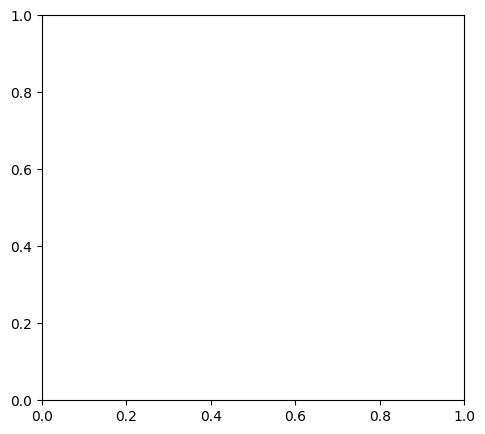

In [ ]:

# Training Loop
for epoch in range(num_epochs):
    model.train()  # Ensure model is in training mode
    running_loss = 0.0
    correct = 0
    total = 0

    # Training loop
    for _, labels, inputs in VAE_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Optionally normalize inputs if needed
        #inputs = (inputs + 4) / 8

        optimizer.zero_grad()  # Reset gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs.squeeze(1), labels.float())  # Loss calculation
        loss.backward()  # Backpropagation
        optimizer.step()  # Gradient descent step

        running_loss += loss.item()  # Accumulate loss
        predicted = (outputs.squeeze(1) > 0.5).float()  # Binary prediction (0 or 1)
        correct += (predicted == labels).sum().item()  # Count correct predictions
        total += labels.size(0)  # Count total samples

    # Calculate and store training loss and accuracy
    train_loss = running_loss / len(train_vae_loader)
    train_accuracy = correct / total * 100
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Validation loop
    model.eval()  # Set model to evaluation mode
    val_loss = 0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for _, labels, inputs in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Optionally normalize inputs if needed
            #inputs = (inputs + 4) / 8

            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs.squeeze(1), labels.float())  # Validation loss
            val_loss += loss.item()

            predicted = (outputs.squeeze(1) > 0.5).float()  # Binary prediction
            correct_val += (predicted == labels).sum().item()  # Count correct predictions
            total_val += labels.size(0)  # Count total samples

    # Calculate and store validation loss and accuracy
    val_loss /= len(test_loader)
    val_accuracy = correct_val / total_val * 100
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    # Print epoch summary
    print(f'Epoch {epoch + 1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, '
          f'Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%')

# Visualization of training process
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss', marker='o')
plt.plot(range(1, num_epochs + 1), val_losses, label='Val Loss', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.grid(True)
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy', marker='o')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Val Accuracy', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
num_epochs = 3
for epoch in range(num_epochs):
    model.train()  # Ensure model is in training mode
    running_loss = 0.0
    correct = 0
    total = 0

    # Training loop
    for _, labels, inputs in train_vae_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Optionally normalize inputs if needed
        #inputs = (inputs + 4) / 8

        optimizer.zero_grad()  # Reset gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs.squeeze(1), labels.float())  # Loss calculation
        loss.backward()  # Backpropagation
        optimizer.step()  # Gradient descent step

        running_loss += loss.item()  # Accumulate loss
        predicted = (outputs.squeeze(1) > 0.5).float()  # Binary prediction (0 or 1)
        correct += (predicted == labels).sum().item()  # Count correct predictions
        total += labels.size(0)  # Count total samples

    # Calculate and store training loss and accuracy
    train_loss = running_loss / len(train_vae_loader)
    train_accuracy = correct / total * 100
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

# Print epoch summary
    print(f'Epoch {epoch + 1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, '
          f'Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%')


Epoch 1/3, Train Loss: 0.5279, Train Accuracy: 97.66%, Val Loss: 0.6675, Val Accuracy: 68.84%
Epoch 2/3, Train Loss: 0.5255, Train Accuracy: 98.14%, Val Loss: 0.6675, Val Accuracy: 68.84%
Epoch 3/3, Train Loss: 0.5258, Train Accuracy: 98.24%, Val Loss: 0.6675, Val Accuracy: 68.84%


In [ ]:

# Validation loop
model.eval()  # Set model to evaluation mode
val_loss = 0
correct_val = 0
total_val = 0
with torch.no_grad():
    for _, labels, inputs in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Optionally normalize inputs if needed
        #inputs = (inputs + 4) / 8

        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs.squeeze(1), labels.float())  # Validation loss
        val_loss += loss.item()

        predicted = (outputs.squeeze(1) > 0.5).float()  # Binary prediction
        correct_val += (predicted == labels).sum().item()  # Count correct predictions
        total_val += labels.size(0)  # Count total samples

# Calculate and store validation loss and accuracy

val_accuracy = correct_val / total_val * 100


# Print epoch summary
print( f'Val Accuracy: {val_accuracy:.2f}%')



Val Accuracy: 69.44%


In [ ]:
test_model(model, val_loader)

Test Accuracy: 50.00%


In [ ]:
# Back Up
import torch
import torch.nn as nn
# Model Nov_01
# Nov. 08. Bottle neck
# good one version 1
class BottleneckLayer(nn.Module):
    def __init__(self, in_channels, bottleneck_channels):
        super(BottleneckLayer, self).__init__()
        self.bottleneck = nn.Sequential(
            nn.Conv1d(in_channels, bottleneck_channels, kernel_size=1),  # 1x1 convolution for bottleneck
            nn.BatchNorm1d(bottleneck_channels),
            nn.ReLU()
        )

    def forward(self, x):
        return self.bottleneck(x)

class InceptionBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(InceptionBlock1D, self).__init__()

        # Branches with different kernel sizes
        self.branch1 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=1),  # 1x1 convolution
            nn.BatchNorm1d(out_channels),
            nn.ReLU(),
            nn.Dropout(0.3)
        )

        self.branch2 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=3, padding=1),  # 3x3 convolution
            nn.BatchNorm1d(out_channels),
            nn.ReLU(),
            nn.Dropout(0.3)
        )

        self.branch3 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=5, padding=2),  # 5x5 convolution
            nn.BatchNorm1d(out_channels),
            nn.ReLU(),
            nn.Dropout(0.3)
        )

        self.branch_pool = nn.MaxPool1d(kernel_size=3, stride=1, padding=1)  # Max pooling branch
        self.branch_pool_conv = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=1),  # 1x1 conv after pooling
            nn.BatchNorm1d(out_channels),
            nn.ReLU(),
            nn.Dropout(0.3)
        )

    def forward(self, x):
        # Apply all branches
        branch1_out = self.branch1(x)
        branch2_out = self.branch2(x)
        branch3_out = self.branch3(x)
        branch_pool_out = self.branch_pool_conv(self.branch_pool(x))

        # Concatenate outputs along the channel dimension
        outputs = torch.cat([branch1_out, branch2_out, branch3_out, branch_pool_out], dim=1)
        return outputs

class AttentionLayer(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(AttentionLayer, self).__init__()
        self.attention = nn.MultiheadAttention(embed_dim=input_dim, num_heads=4)
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        # x shape: (batch_size, channels, seq_length)
        x = x.permute(2, 0, 1)  # Change to (seq_length, batch_size, channels)
        attn_output, _ = self.attention(x, x, x)  # Self-attention
        x = attn_output.permute(1, 2, 0)  # Change back to (batch_size, channels, seq_length)
        return x  # No linear transformation here

class InceptionModel1D(nn.Module):
    def __init__(self, input_channels, num_classes, seq_length):
        super(InceptionModel1D, self).__init__()

        # Bottleneck layer
        self.bottleneck = BottleneckLayer(input_channels, 32)  # Reduced bottleneck channels

        # Single Inception block to extract multi-scale features
        self.inception = InceptionBlock1D(32, 32)  # 32 output channels

        # Adjust the number of channels going into the attention layer
        self.attention = AttentionLayer(128, 128)  # 128 output channels from inception

        # The input dimension for the fc_layer needs to be adjusted based on the attention layer's output
        self.fc_layer = nn.Linear(128 * seq_length, num_classes)  # Adjusted output size

    def forward(self, x):
        # Apply bottleneck layer
        x = self.bottleneck(x)  # Output shape: (batch_size, 32, seq_length)

        # Apply Inception block
        x = self.inception(x)  # Output shape: (batch_size, 128, seq_length)

        # Apply attention layer
        x = self.attention(x)  # Output shape: (batch_size, 128, seq_length)

        # Flatten the output before the fully connected layer
        x_flat = x.reshape(x.size(0), -1)  # (batch_size, 128 * seq_length)


        # Fully connected layer
        out = self.fc_layer(x_flat)  # (batch_size, num_classes)

        return out



# Section 3

In [ ]:
import torch
import torch.nn as nn

class InceptionBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(InceptionBlock1D, self).__init__()
        # Branches with different kernel sizes
        self.branch1 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=1, padding=0),
            nn.BatchNorm1d(out_channels),
            nn.ReLU(),
            nn.Dropout(0.3)
        )
        self.branch2 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm1d(out_channels),
            nn.ReLU(),
            nn.Dropout(0.3)
        )
        self.branch3 = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=5, padding=2),
            nn.BatchNorm1d(out_channels),
            nn.ReLU(),
            nn.Dropout(0.3)
        )
        self.branch_pool = nn.MaxPool1d(kernel_size=3, stride=1, padding=1)
        self.branch_pool_conv = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=1),
            nn.BatchNorm1d(out_channels),
            nn.ReLU(),
            nn.Dropout(0.3)
        )

    def forward(self, x):
        branch1_out = self.branch1(x)
        branch2_out = self.branch2(x)
        branch3_out = self.branch3(x)
        branch_pool_out = self.branch_pool_conv(self.branch_pool(x))
        outputs = torch.cat([branch1_out, branch2_out, branch3_out, branch_pool_out], dim=1)
        return outputs

class InceptionModel1D(nn.Module):
    def __init__(self, input_channels, num_classes, seq_length):
        super(InceptionModel1D, self).__init__()

        # Define Inception blocks for segments
        self.inception = InceptionBlock1D(input_channels, 32)

        # LSTM layer for temporal sequence processing
        self.lstm = nn.LSTM(128, 64, batch_first=True)  # LSTM input size will be adjusted accordingly

        # Fully connected layers for classification
        self.fc1 = nn.Linear(64, 32)  # First fully connected layer
        self.fc2 = nn.Linear(32, num_classes)  # Output size to number of classes

    def forward(self, x):
        # Split the input into 4 segments of 20 time points each
        segments = x.split(20, dim=2)  # Assuming the input shape is (batch_size, input_channels, 80)

        # Apply Inception block to each segment
        inception_outputs = [self.inception(segment) for segment in segments]  # List of outputs from Inception blocks

        # Concatenate outputs from all segments
        concatenated_output = torch.cat(inception_outputs, dim=2)  # New shape: (batch_size, out_channels * num_branches, 4)

        # Rearrange for LSTM: (batch_size, seq_length, num_features)
        concatenated_output = concatenated_output.permute(0, 2, 1)  # Shape: (batch_size, 4, out_channels * num_branches)

        # Apply LSTM
        lstm_out, (hn, cn) = self.lstm(concatenated_output)  # LSTM output shape: (batch_size, 4, 64)

        # Use the last output for classification
        out = self.fc1(lstm_out[:, -1, :])  # Get the last time step output for classification
        out = nn.ReLU()(out)  # Activation
        out = self.fc2(out)  # Final output layer

        return out
